# Assignment 3 




Due by 11:59pm, Apr. 23, 2023

## Theory Questions (Question 1: 5 points, Question 2: 5 points, Question 3: 10 points)

***

1. Suppose I is 5X5 image, K is a filter. Compute the convolution of the image I with K, stride =1.

I:

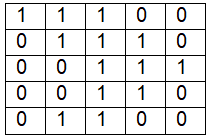

K:

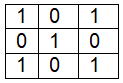

a)With zero padding.

b)Without padding.






**Answer:**

***

<h1>By mistake, I shuffled the order of a) and b), I have clearly mentioned below. Please ignore the humble mistake.</h1>



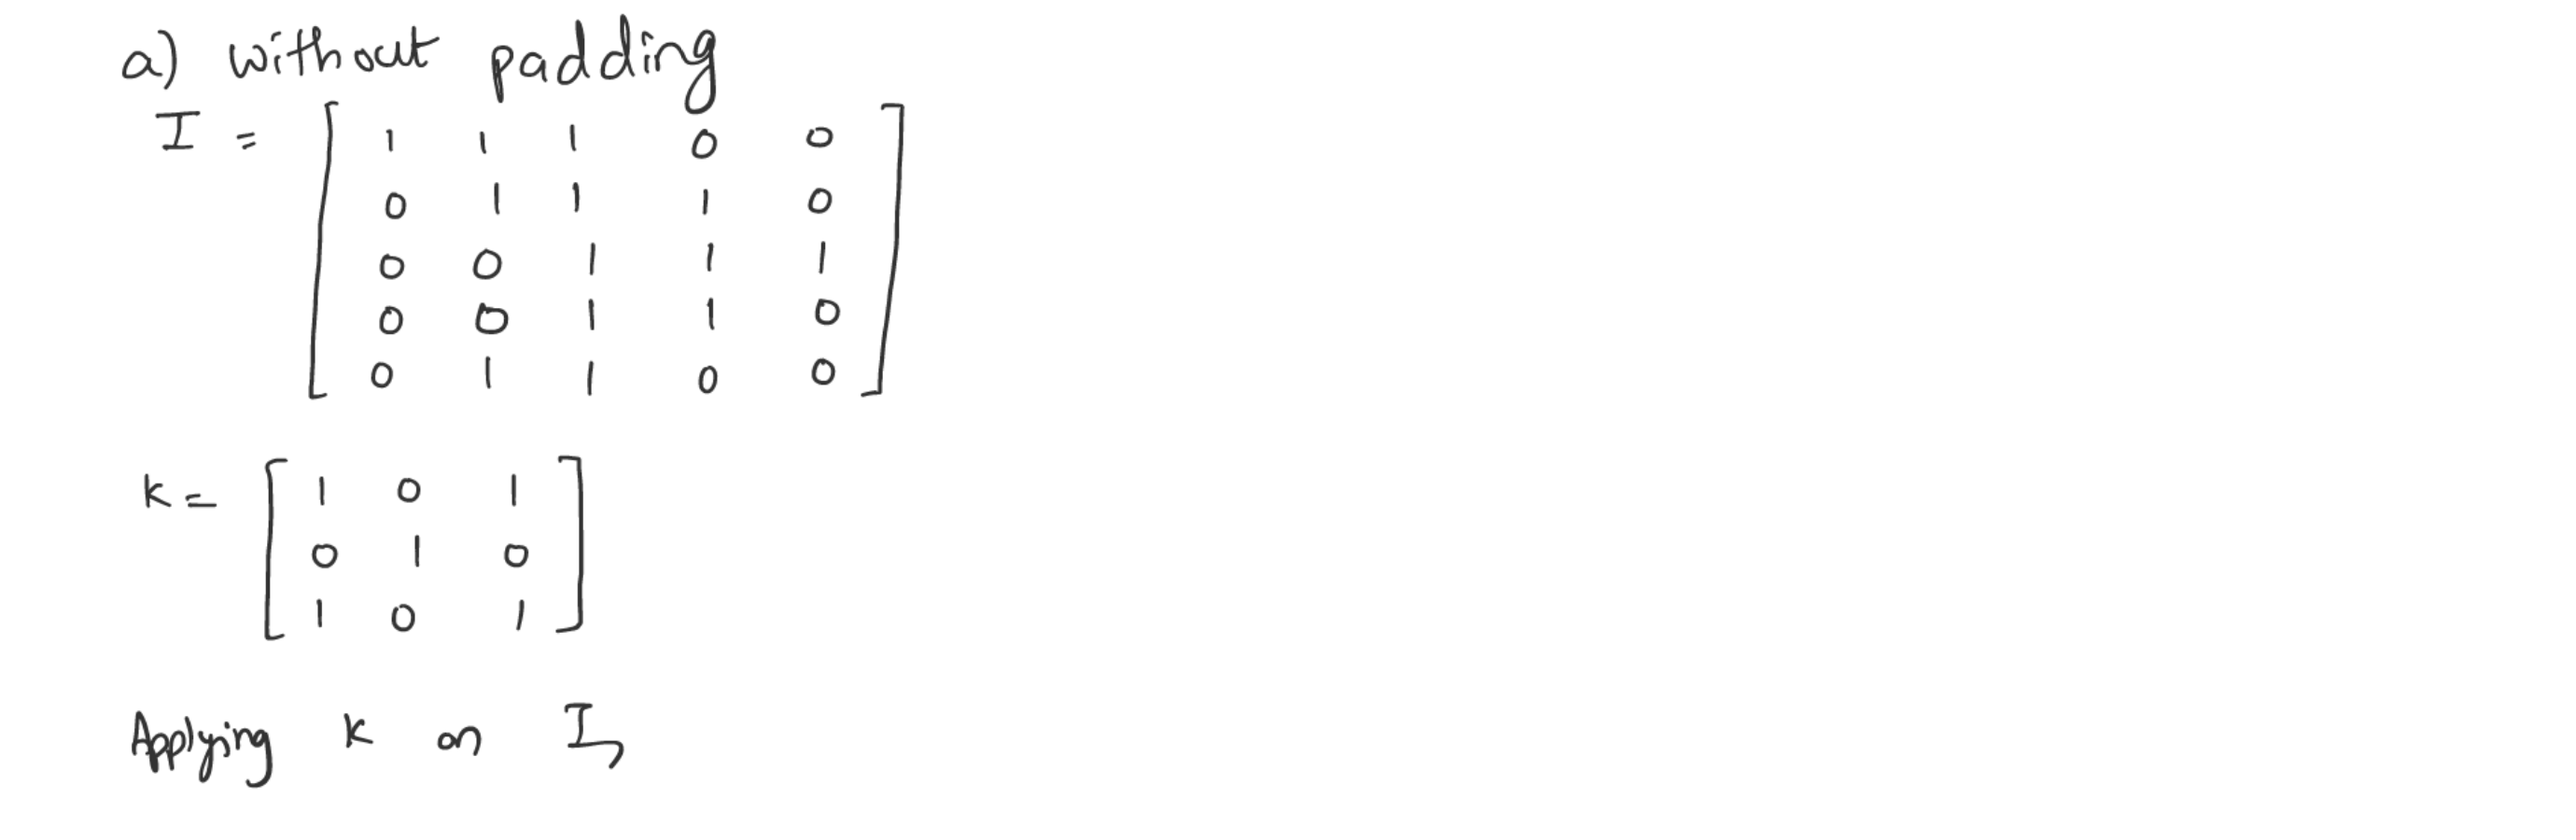

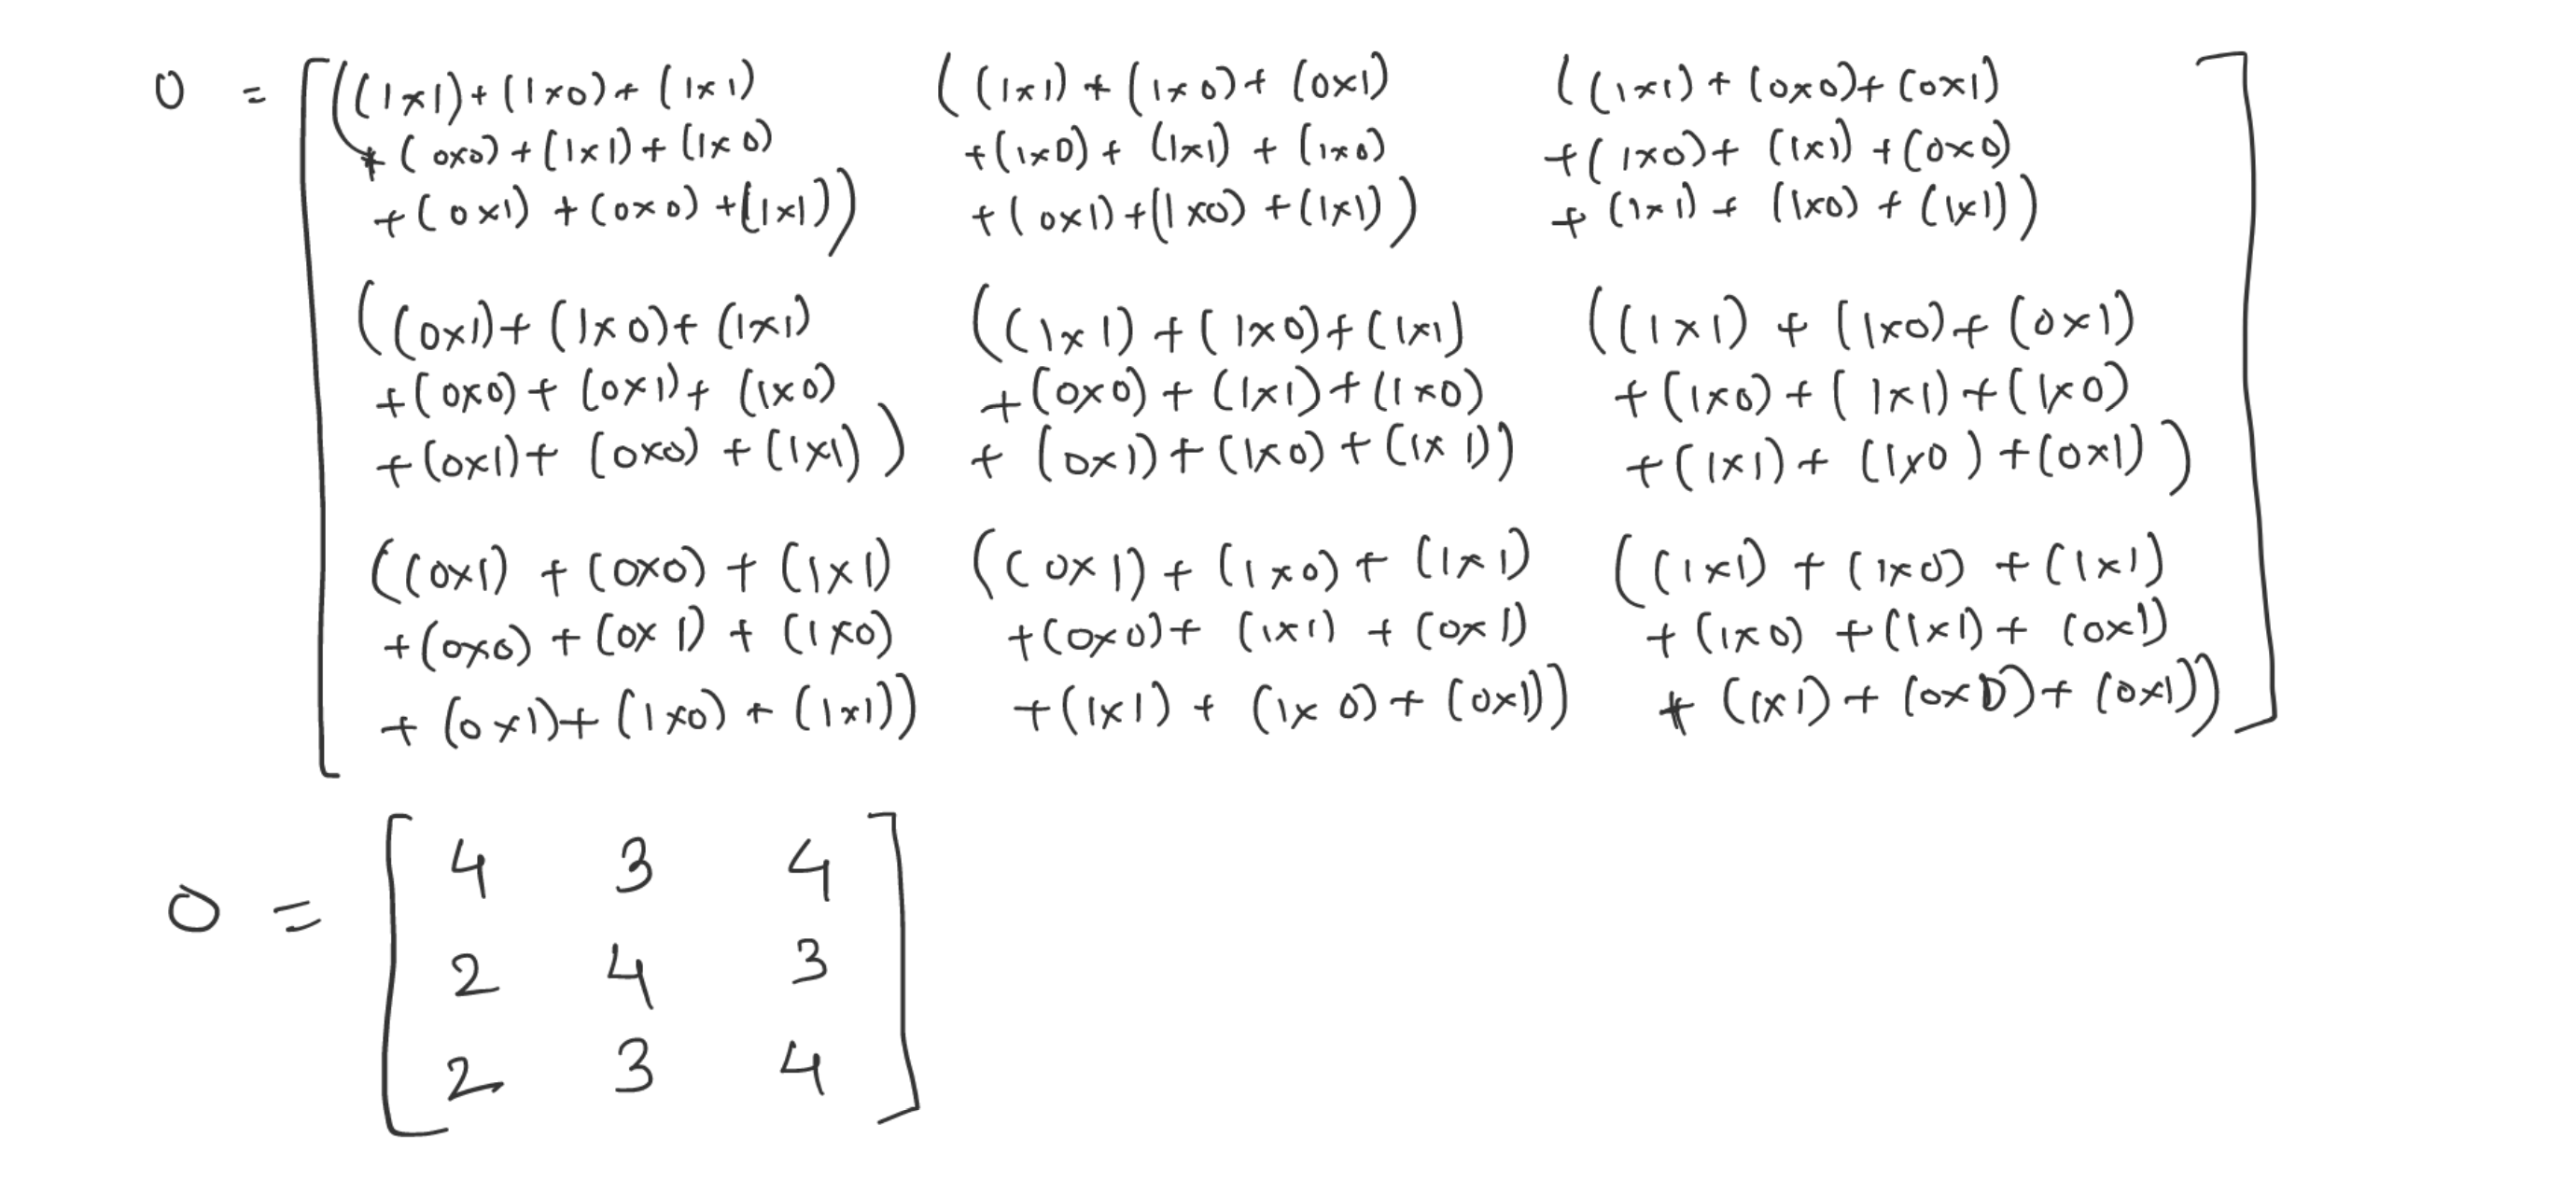

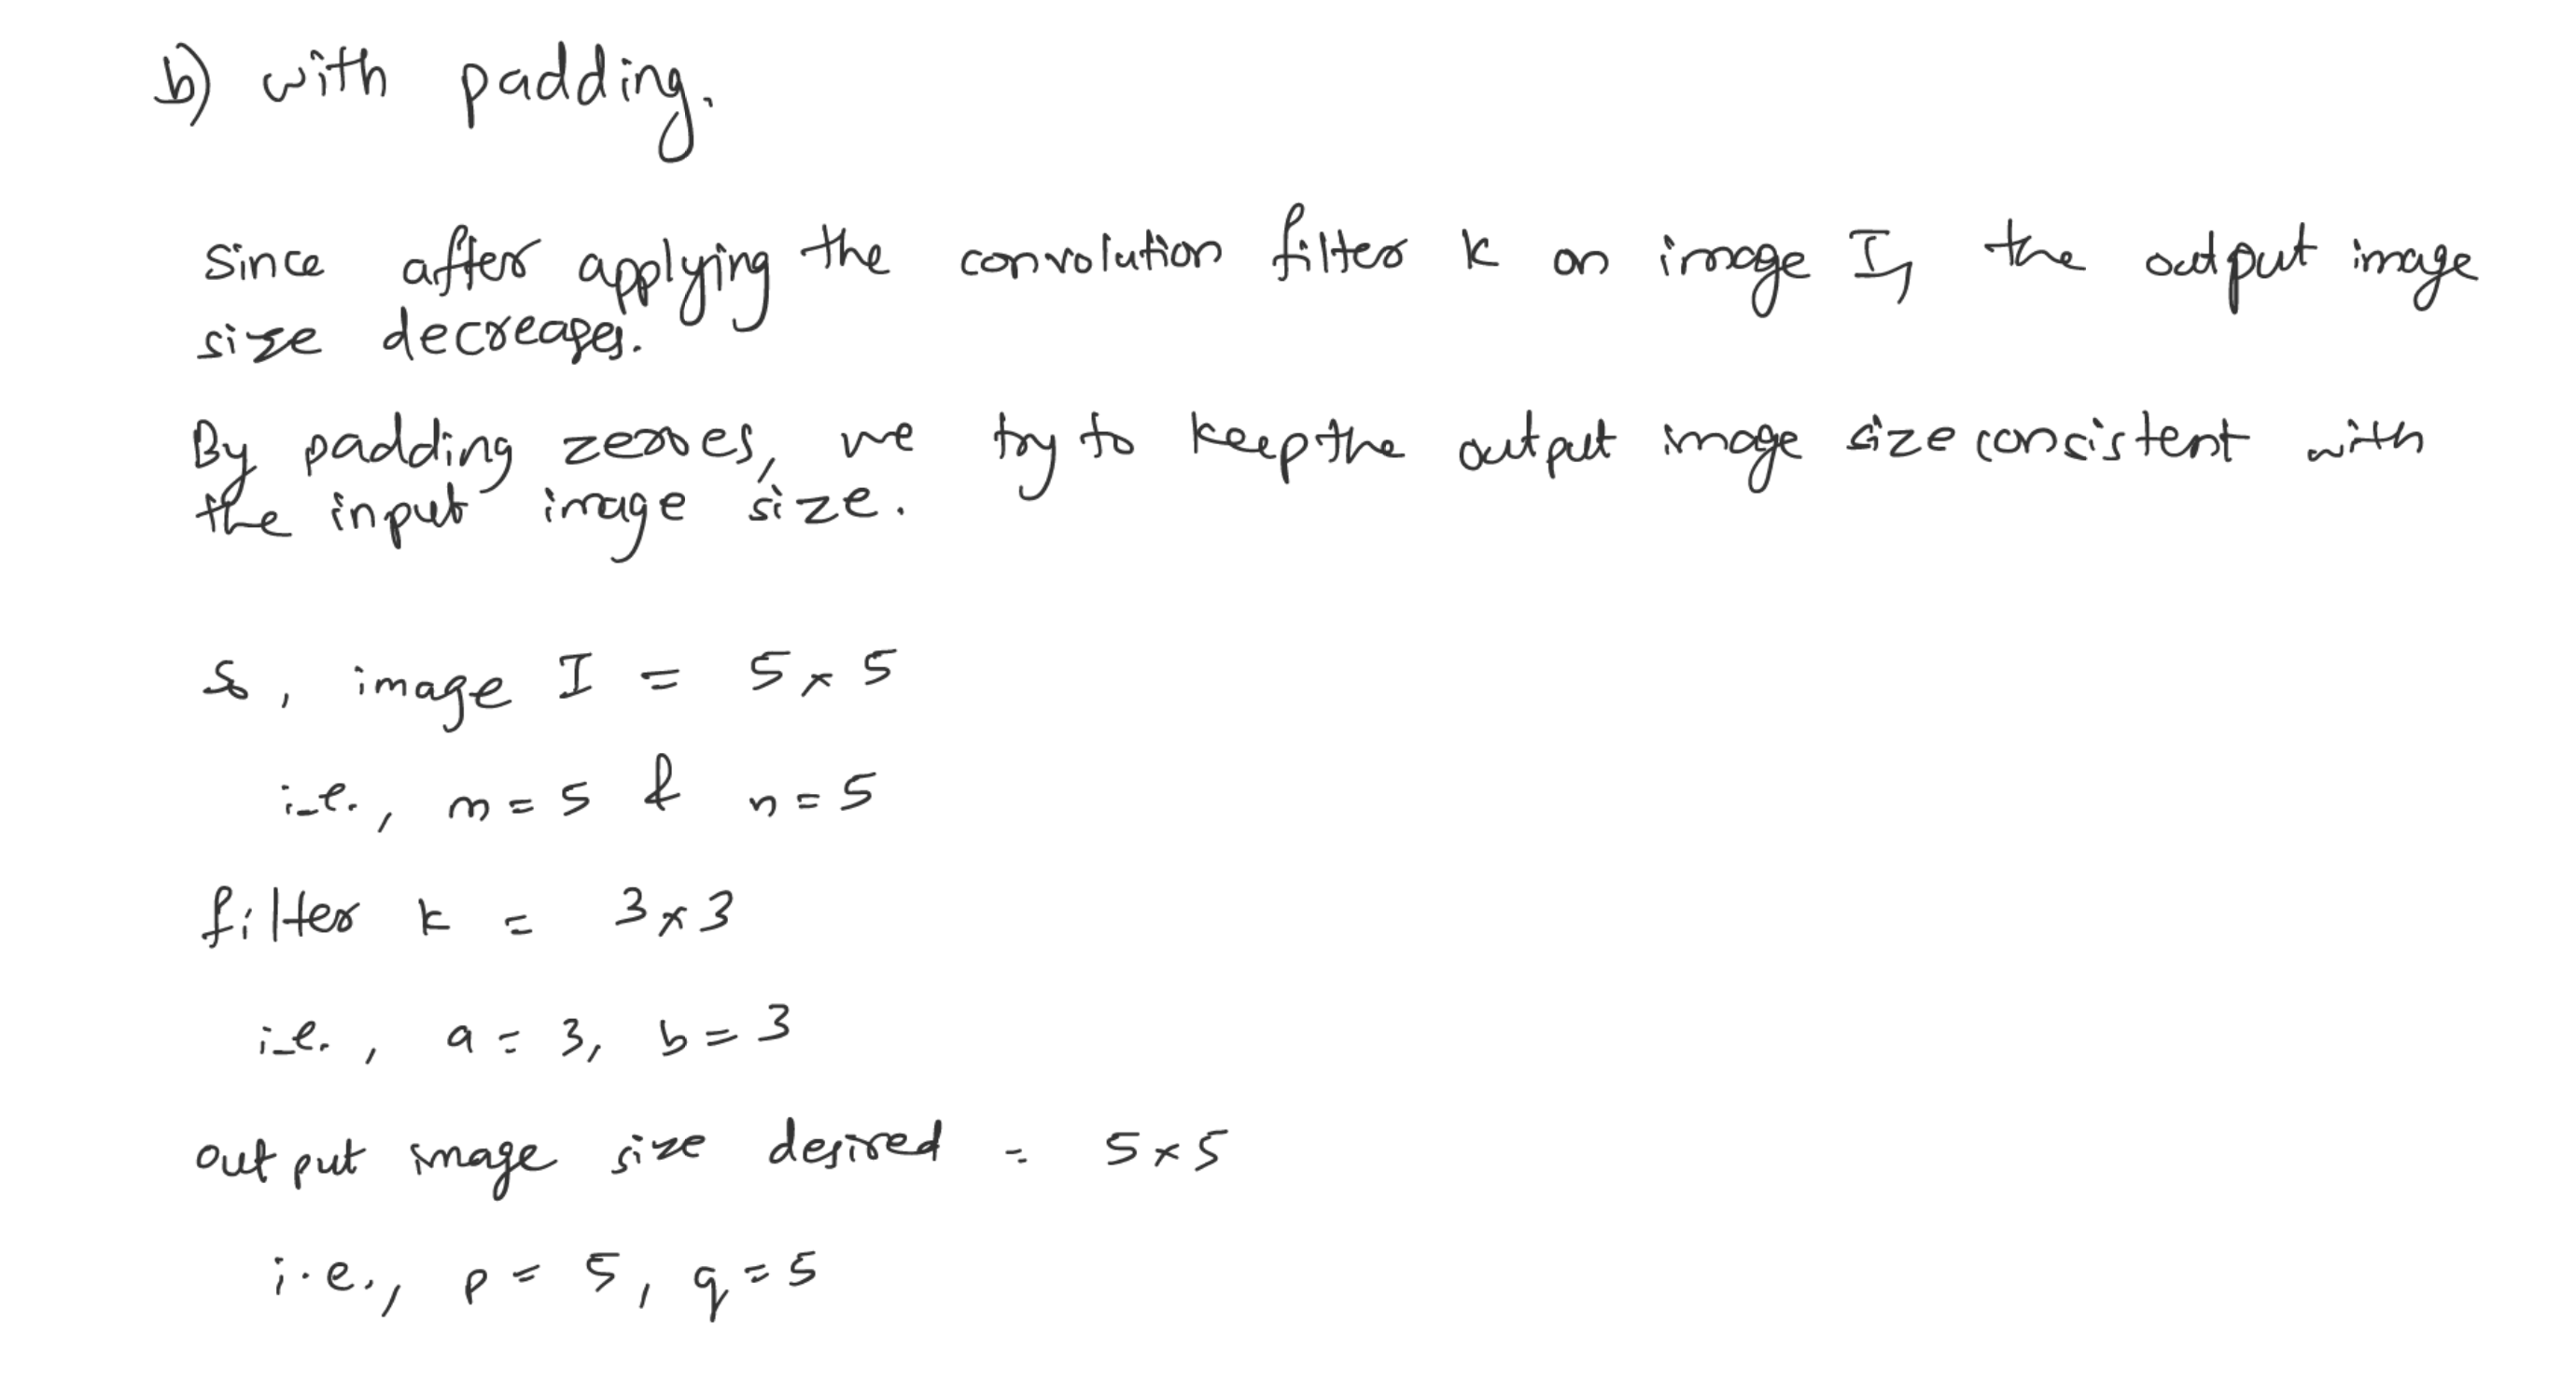

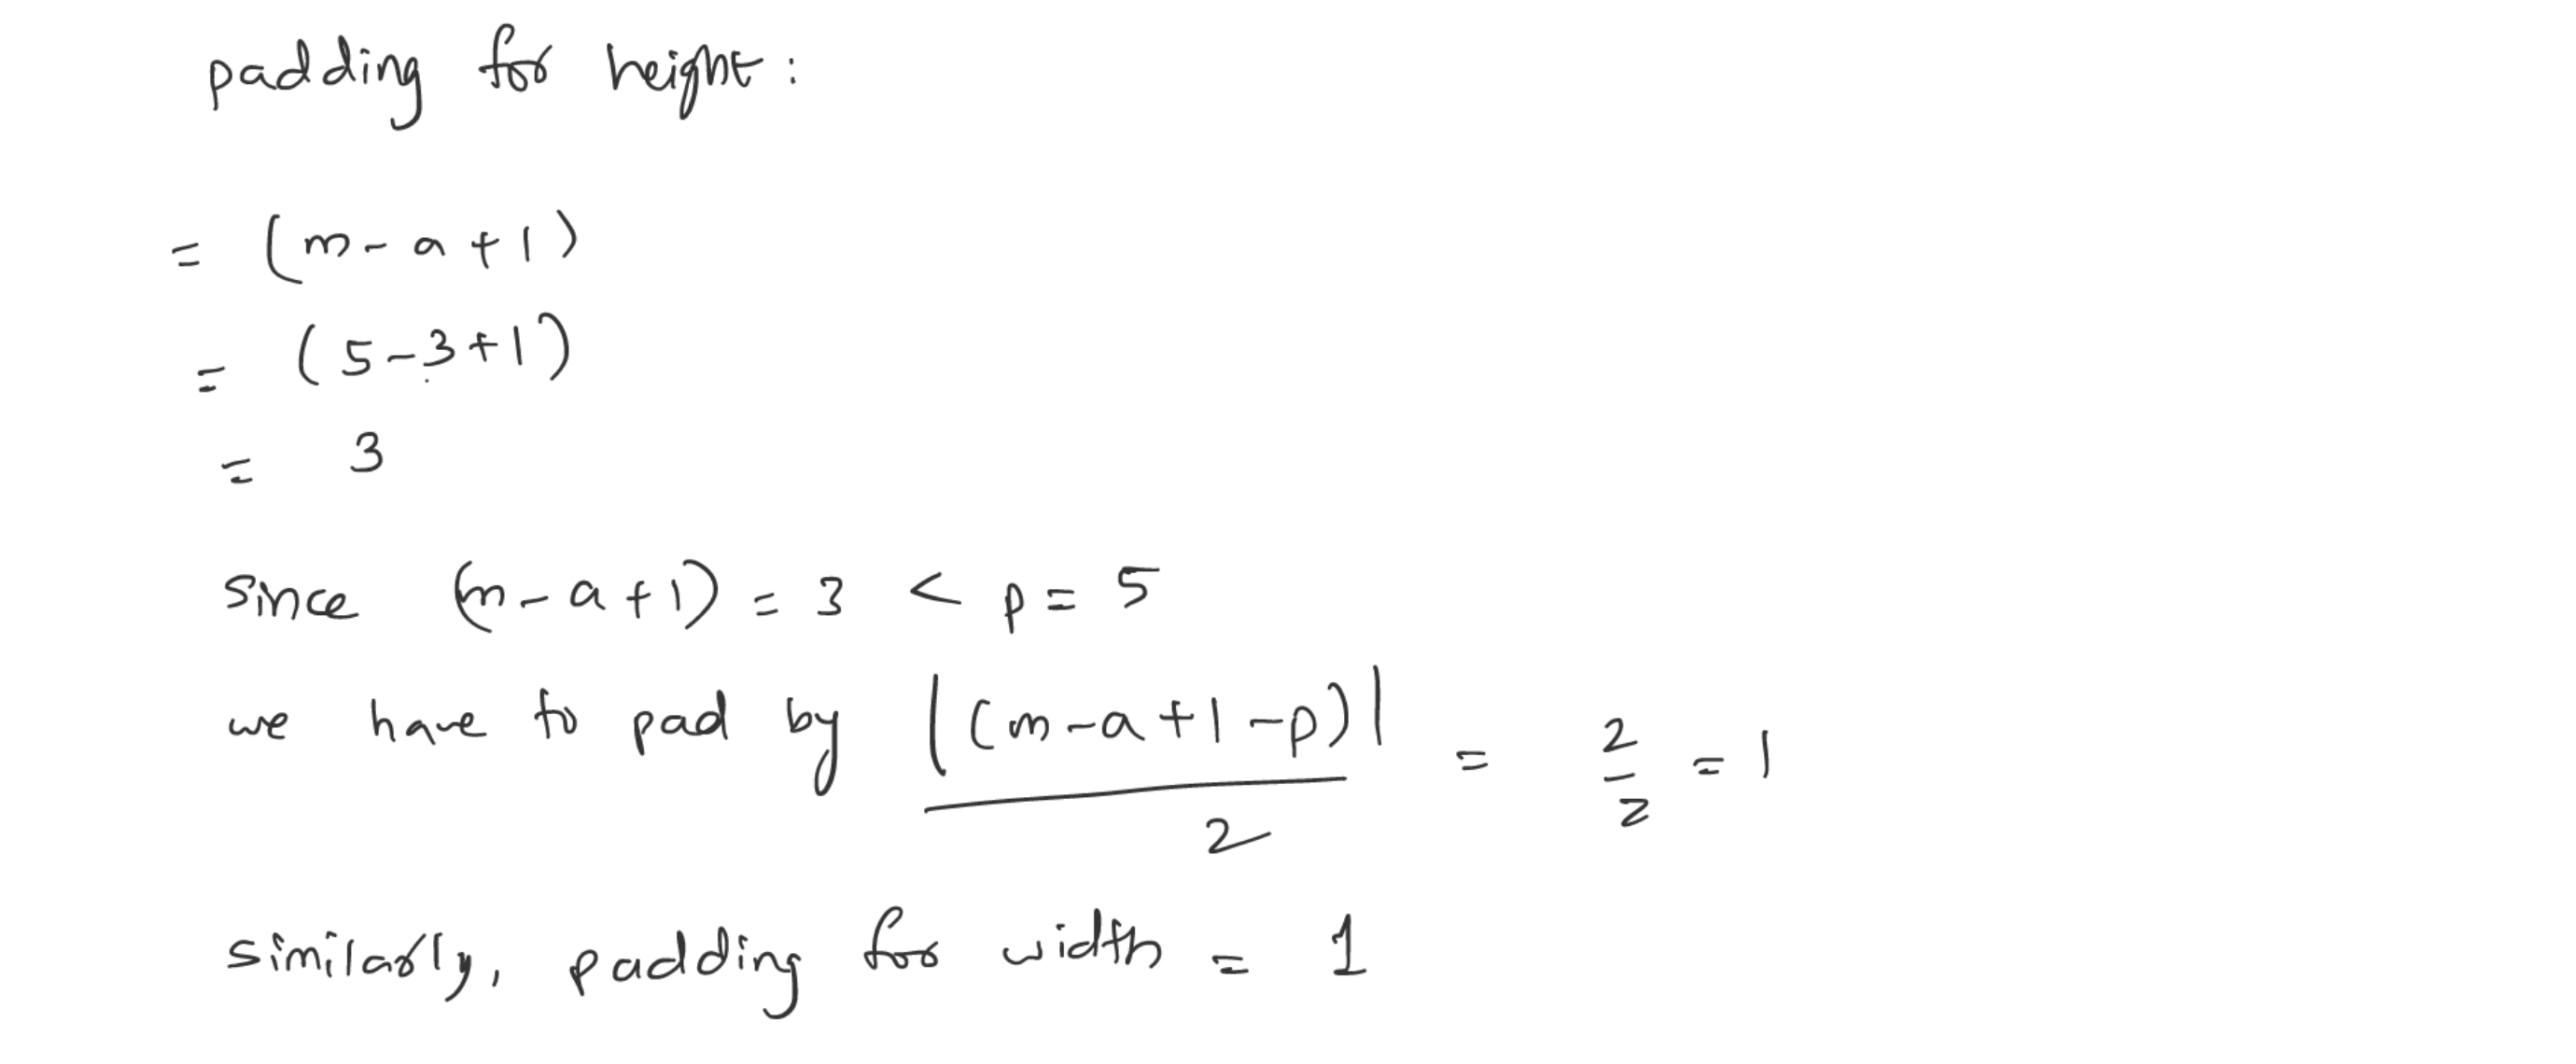

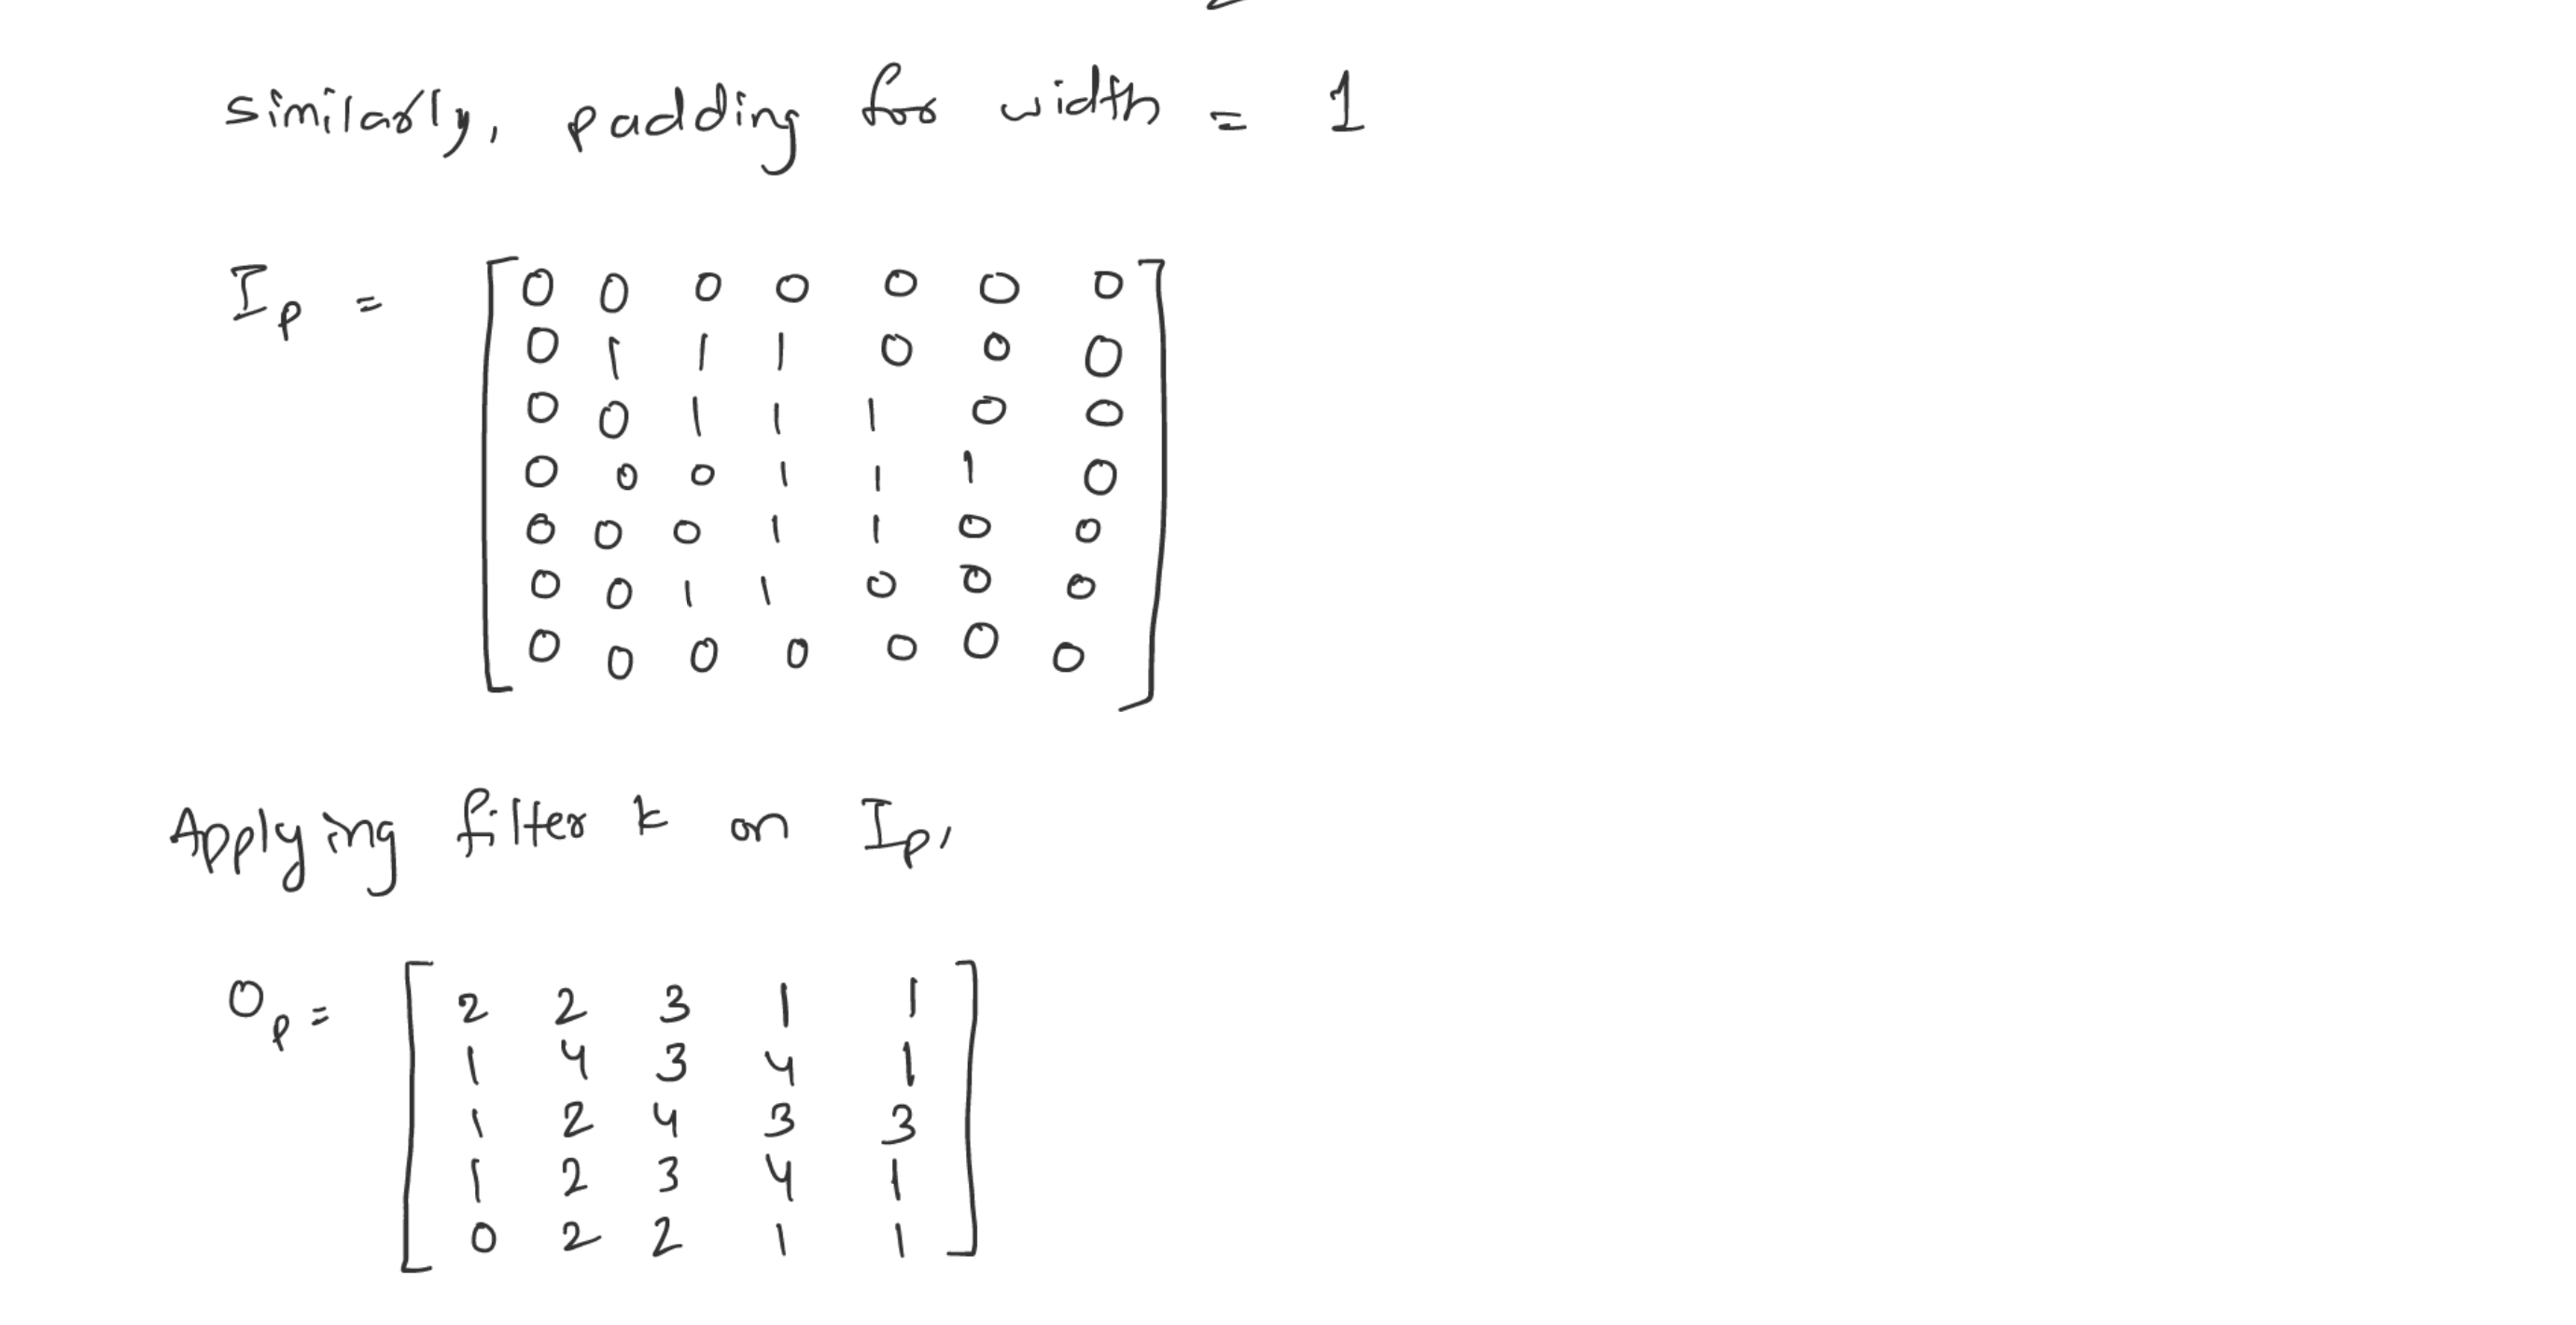

2.Let I be the input. Write the output using max pooling with 2X2 filter, stride = 2.

I:
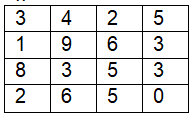




**Answer:**

***

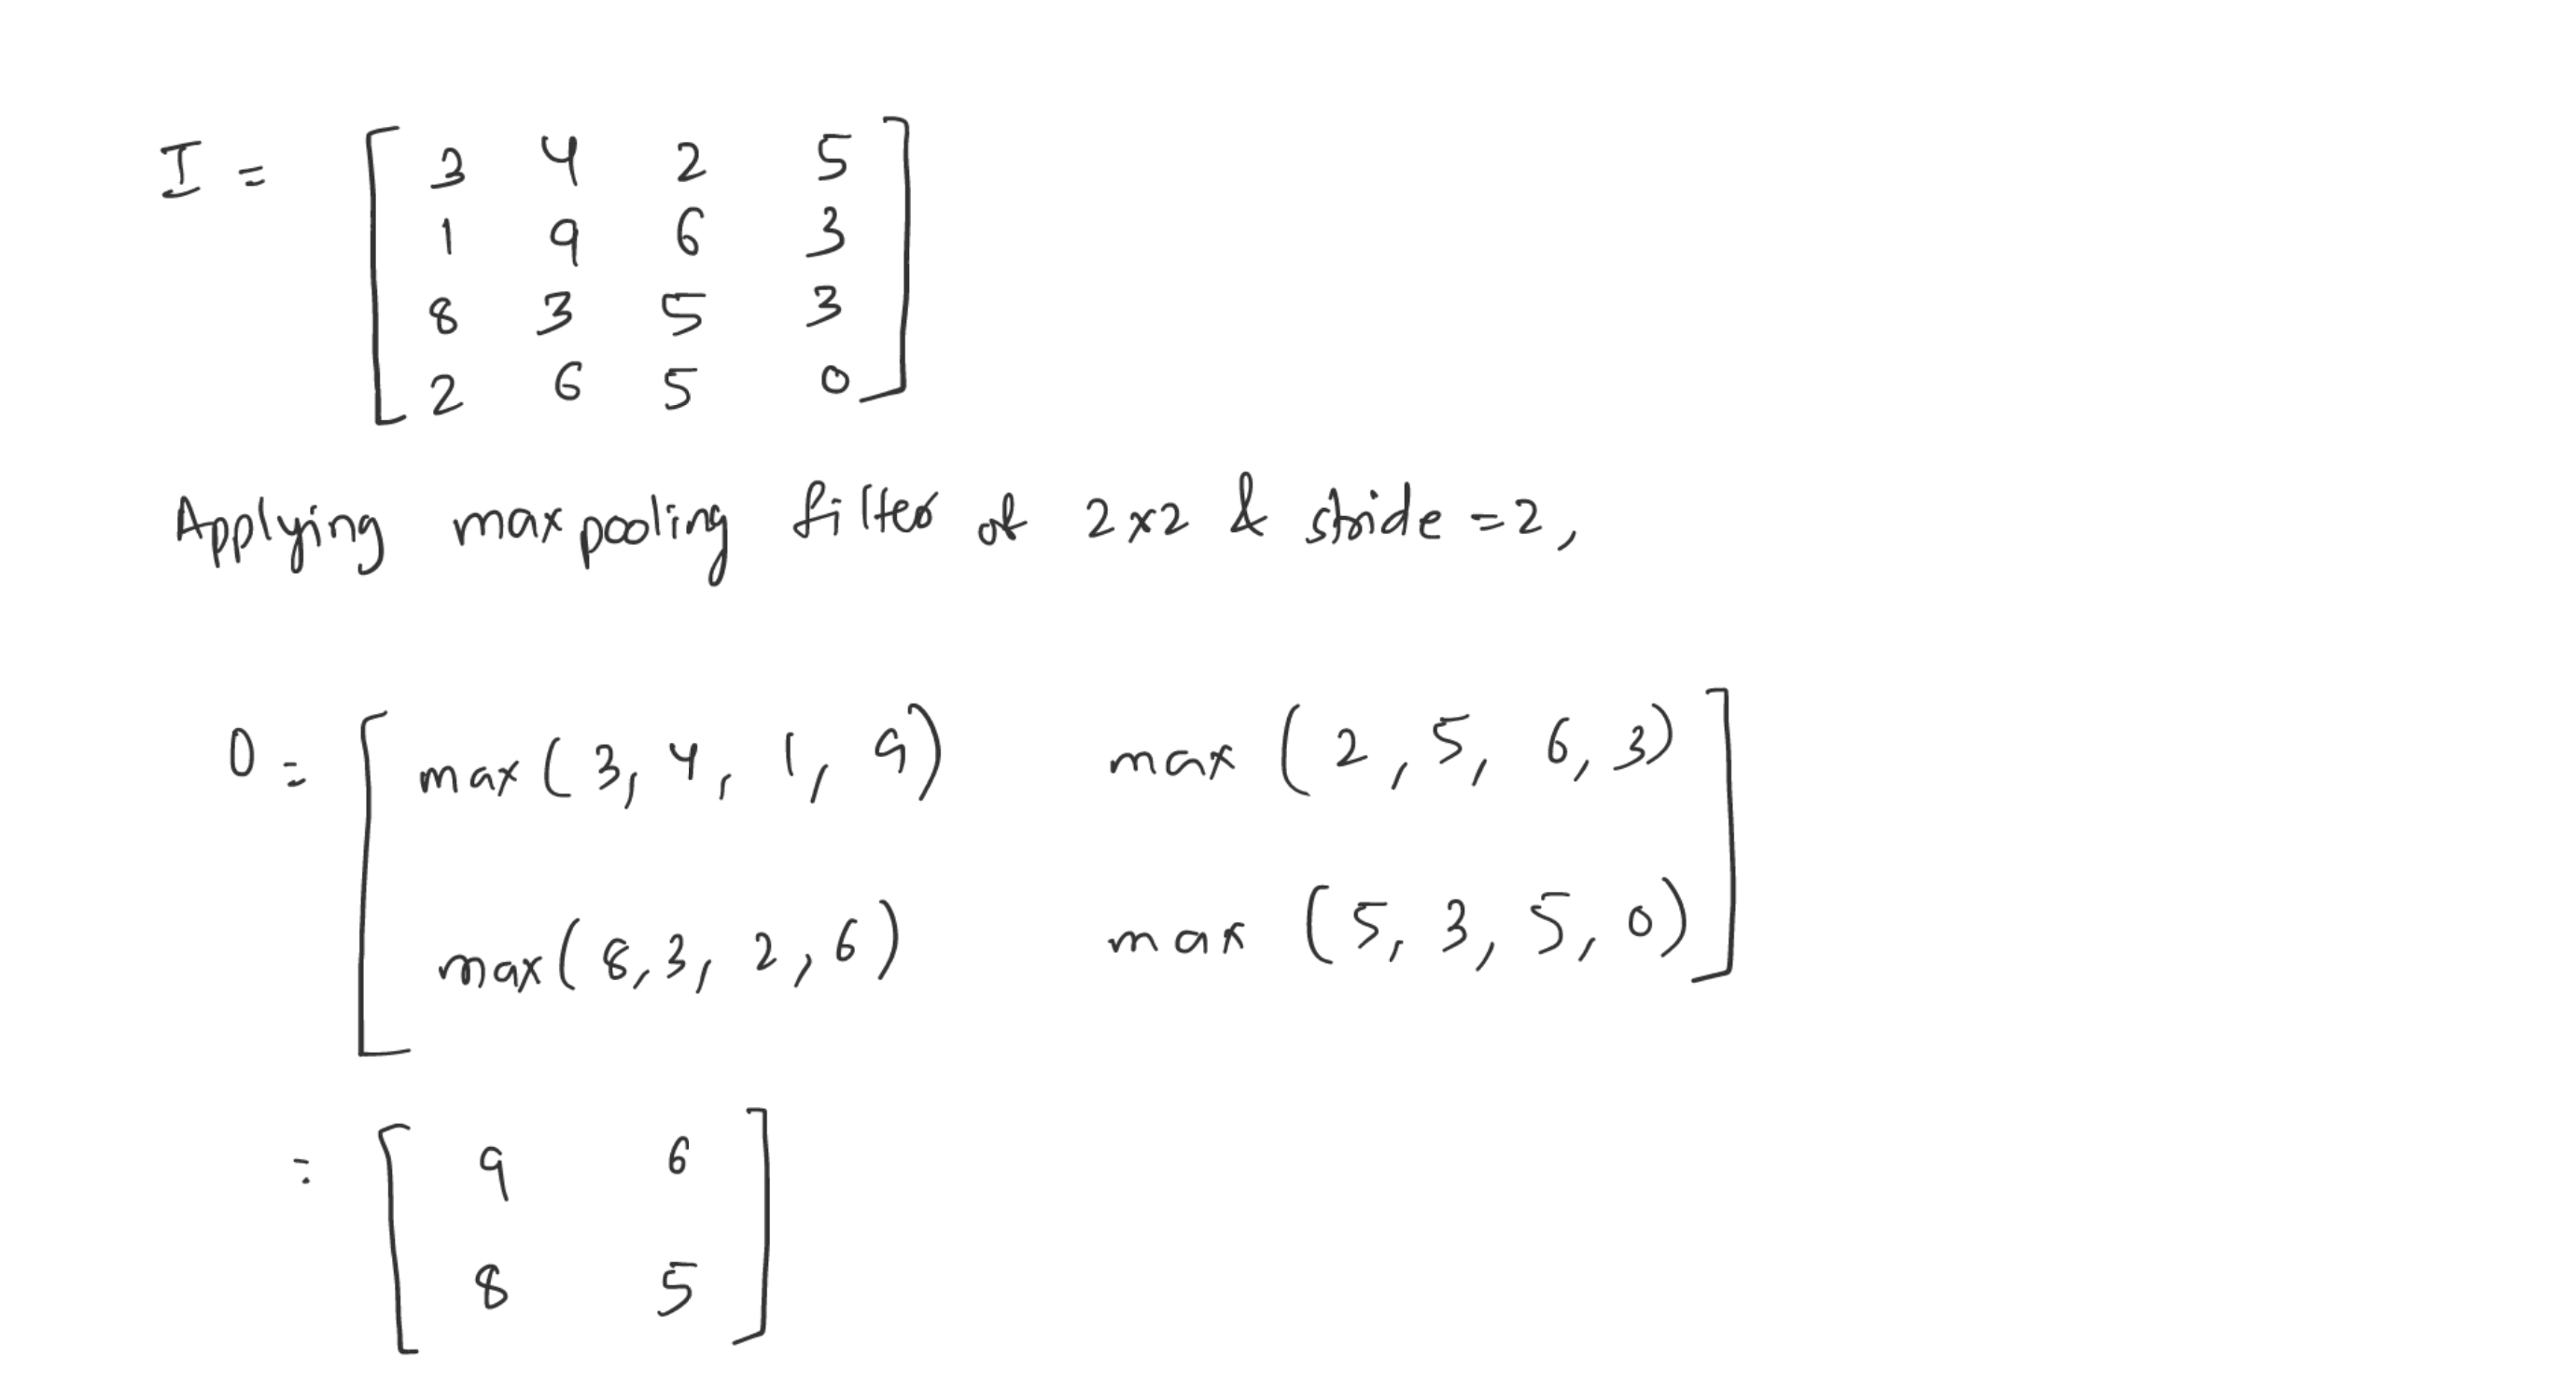

3.Let I be the 5X5 RGB image. K is a 3X3 filter having all 1s. 

For the R channel, we have,
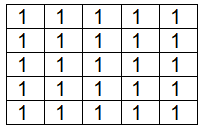

For the G channel, we have,
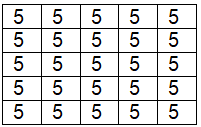

For the B channel, we have,
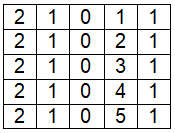

Compute the convolution of I with K, stride = 1, without padding.




**Answer:**

***

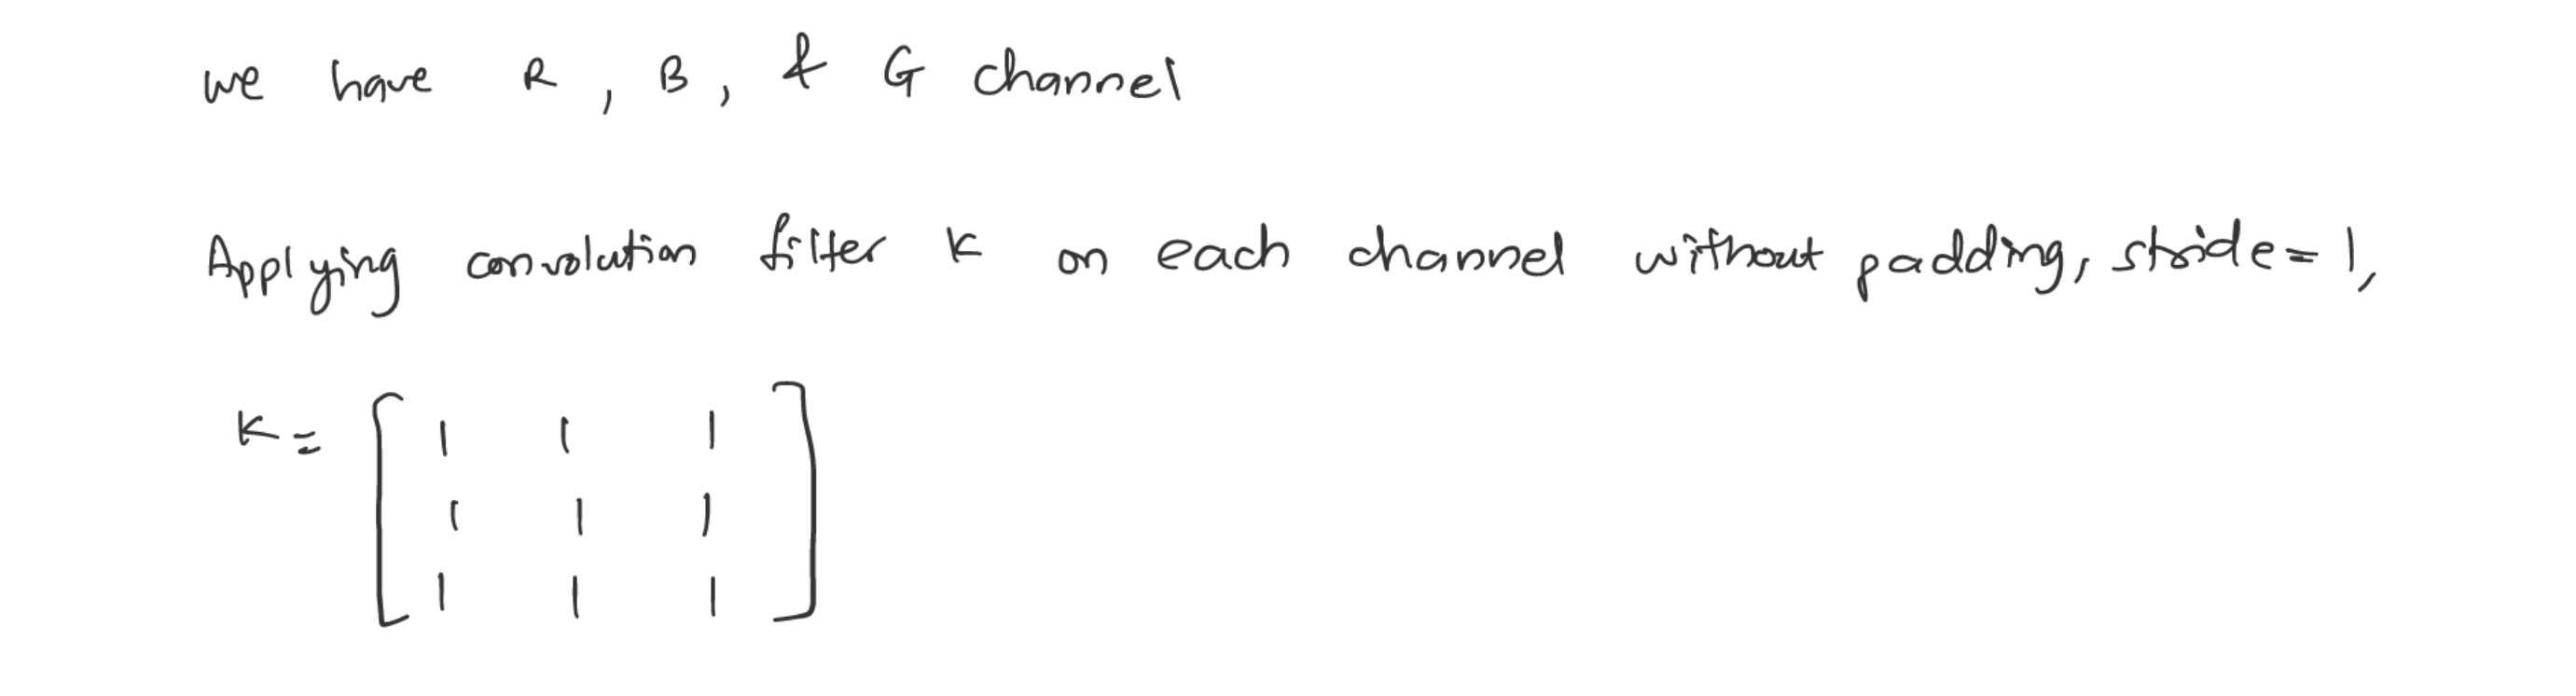

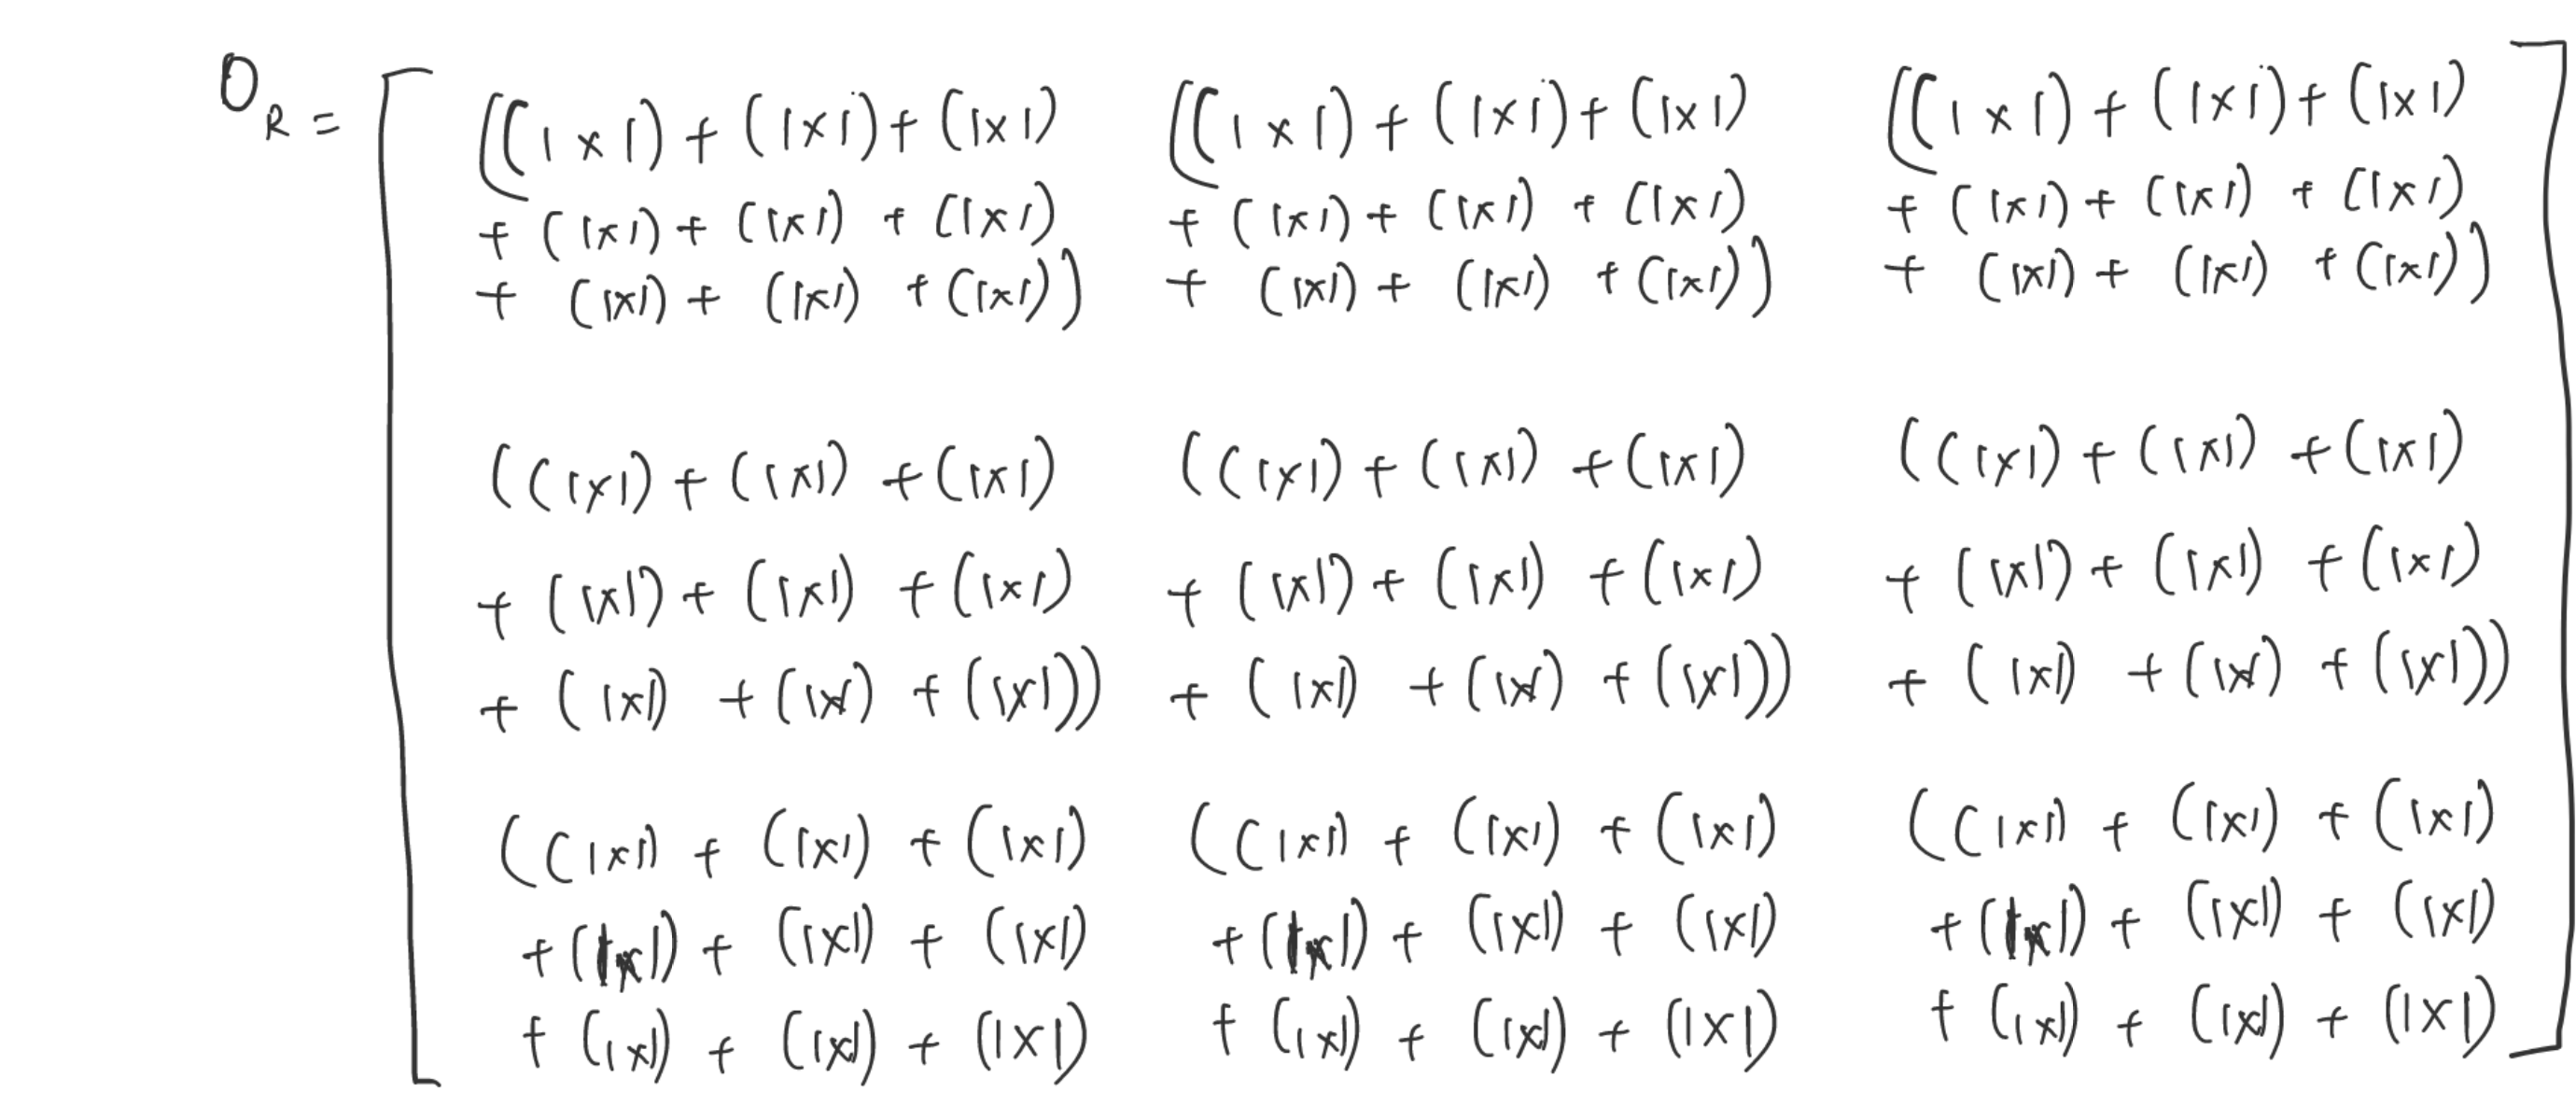

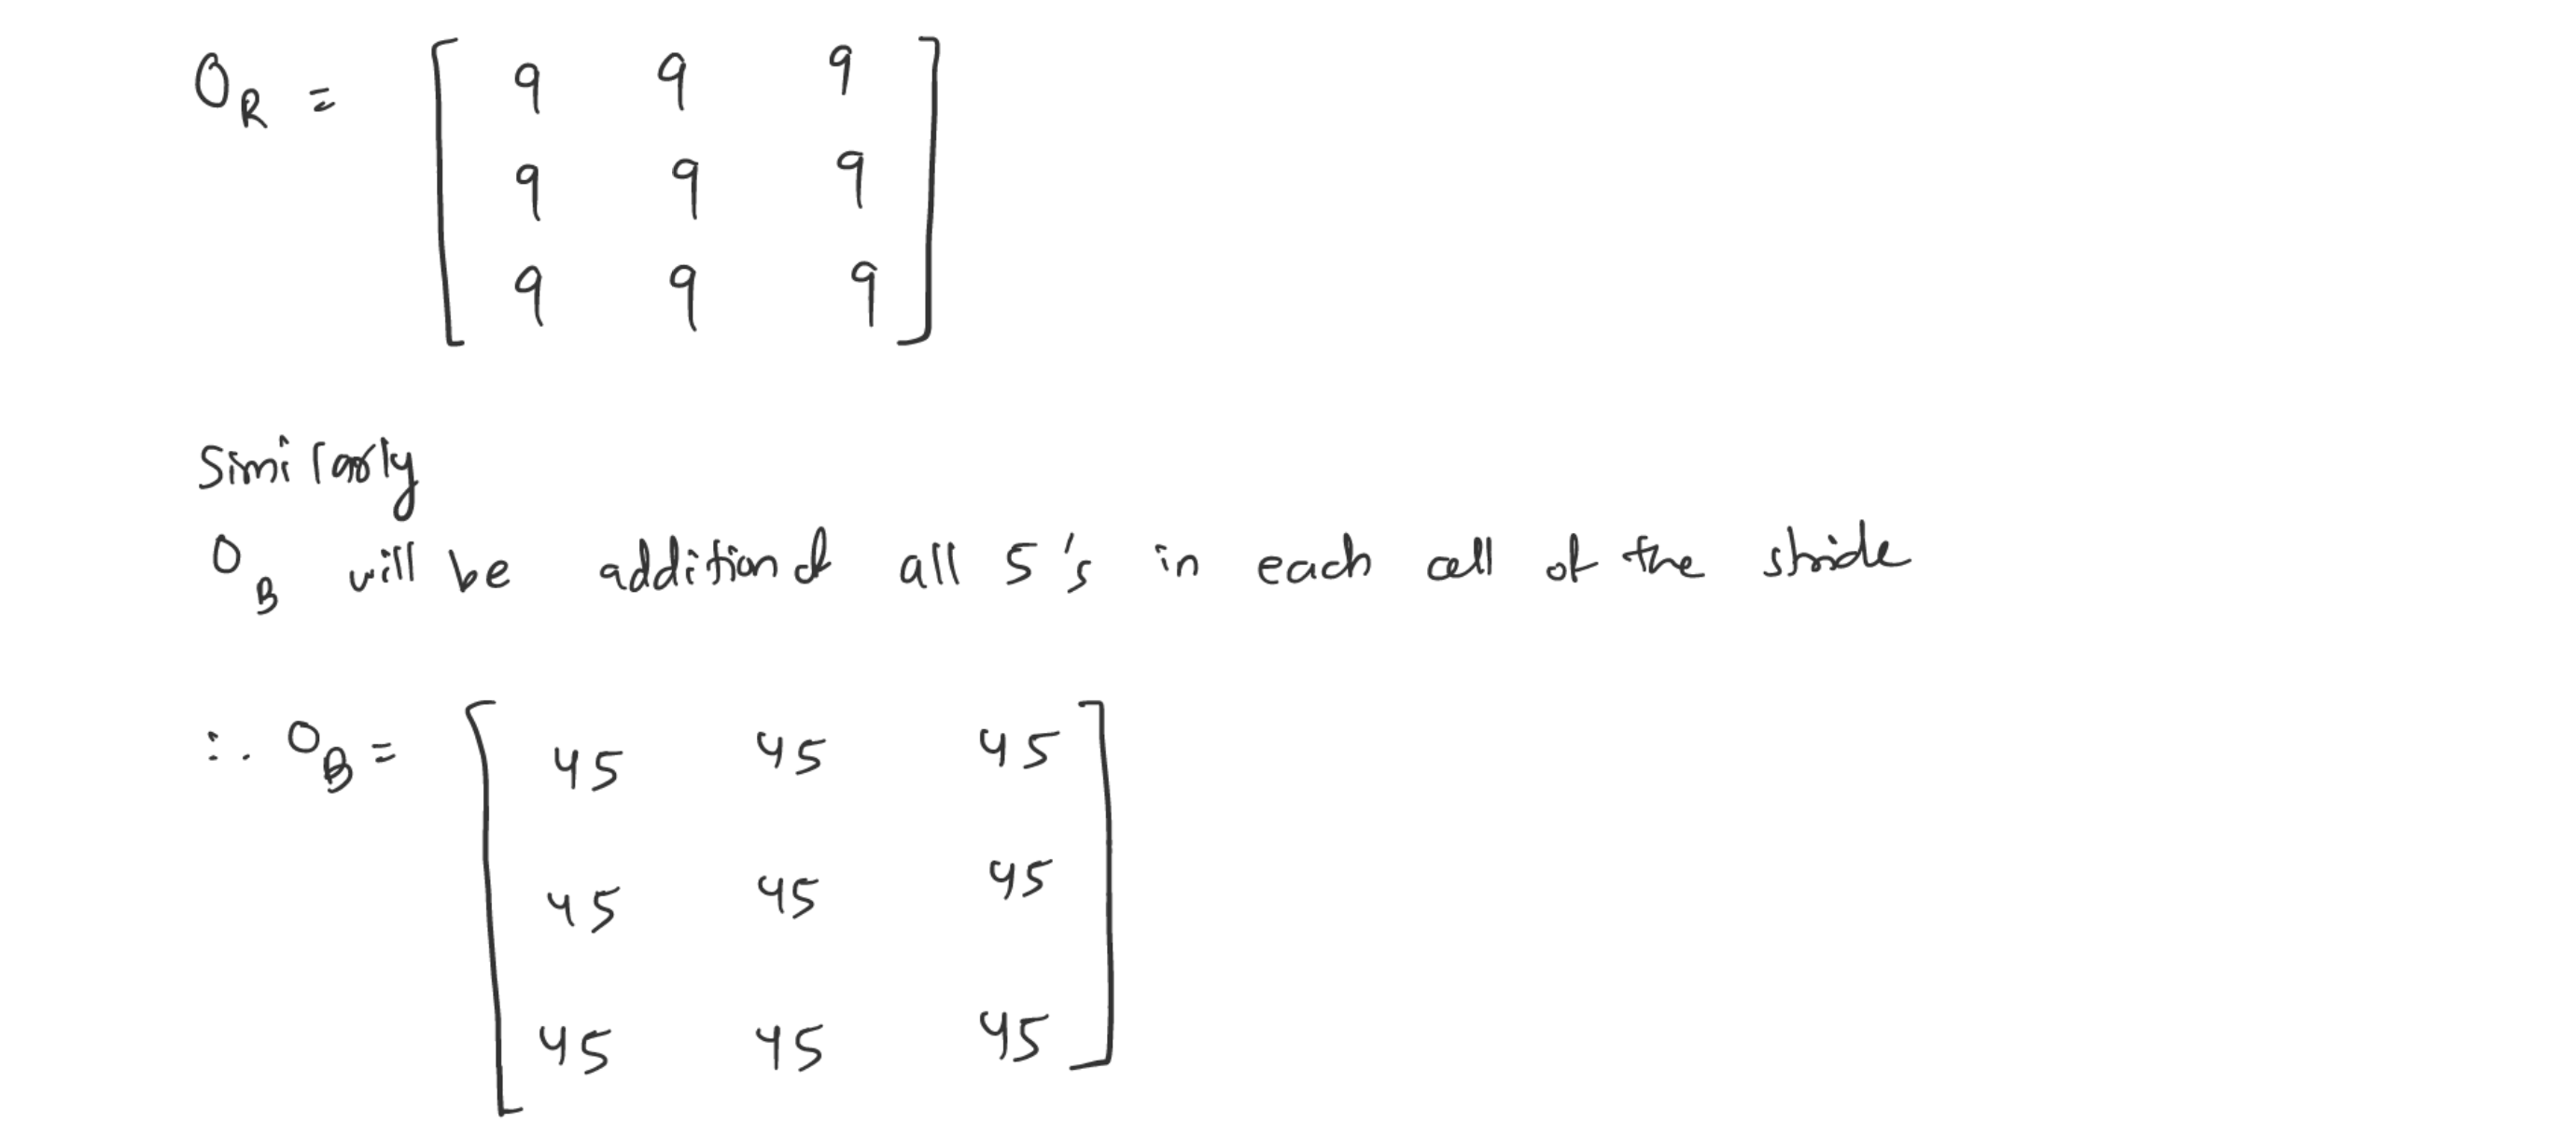

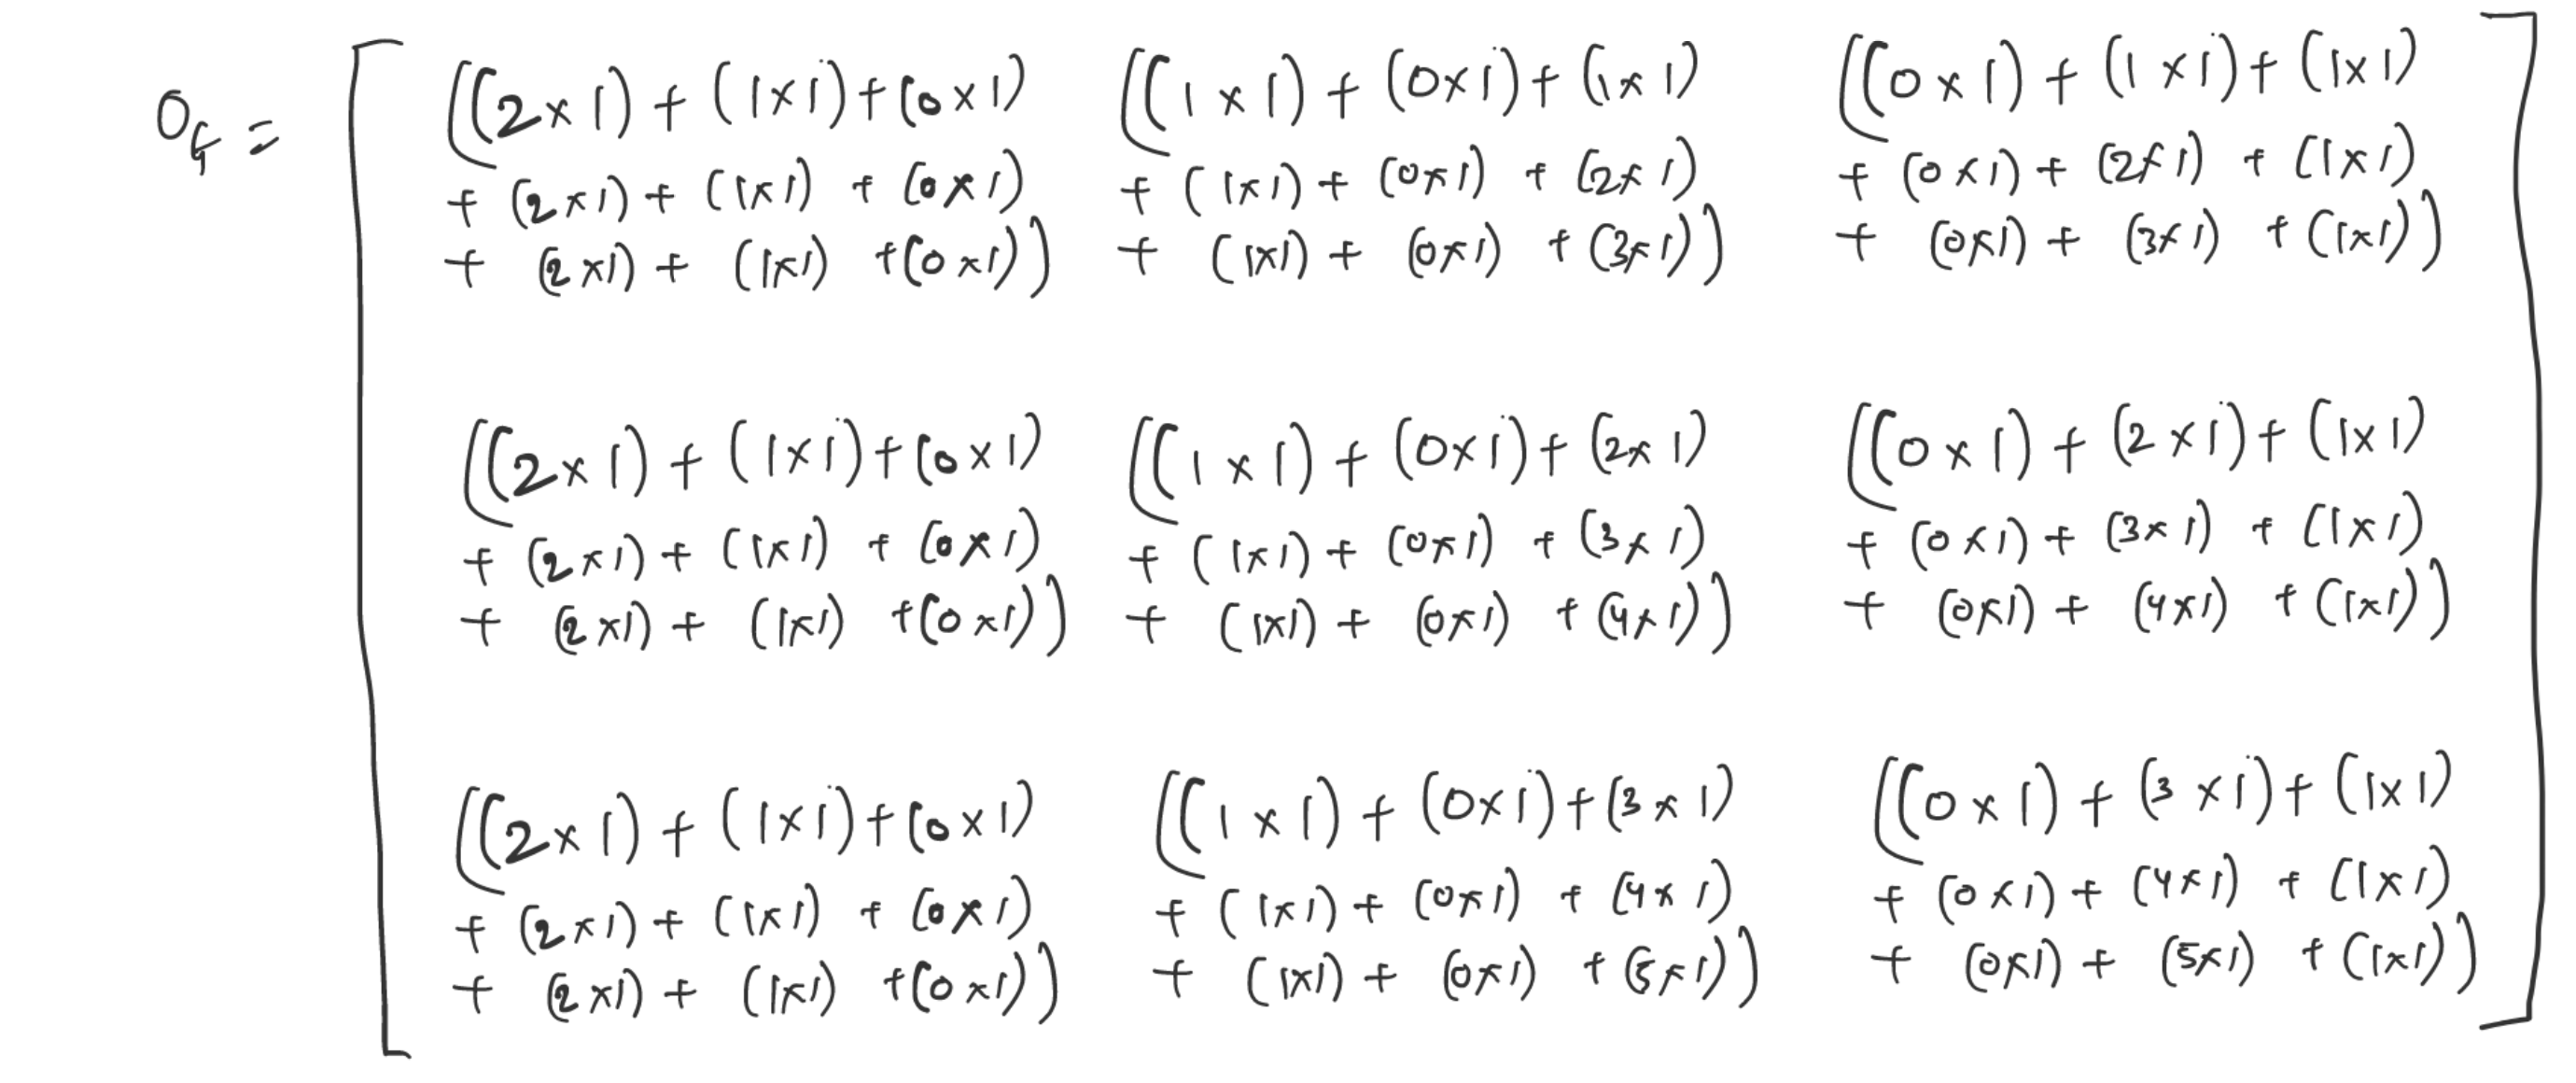

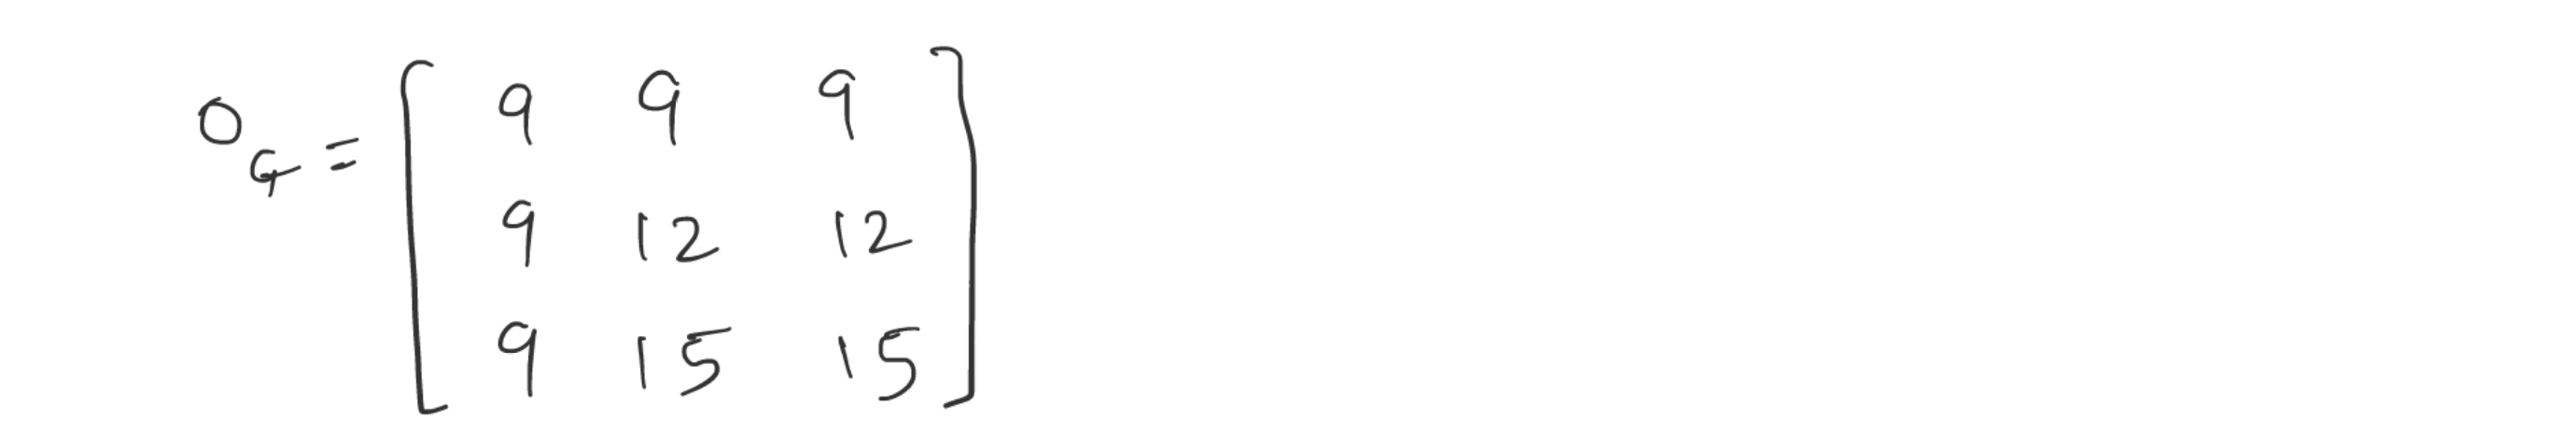

## Programming Questions (Question 4: 50 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set. 

(1) Build the sequential classification with several dense layers. Don’t use convolution layers. 

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy.

(2)Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy. Compare to the previous result.



<h3>Some Details About MNIST Dataset</h3>

The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits from 0 to 9. Each image is 28 pixels wide and 28 pixels high, making a total of 784 pixels in each image. The dataset is widely used as a benchmark for image classification tasks in machine learning and computer vision. The MNIST database consists of 60,000 training images and 10,000 testing images.

Citation for MNIST dataset
<br>Deng, L. (2012). The mnist database of handwritten digit images for machine learning research. IEEE Signal Processing Magazine, 29(6), 141–142.

In [1]:
#Importing all the necessary libraries and packages.
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

2023-04-23 18:46:28.767888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Loading the MNIST dataset as train and test data.
(training_dataset, training_labels), (test_dataset, test_labels) = mnist.load_data()

#Printing the sizes of datasets for my debug purposes.
# print(len(training_dataset))
# print(len(training_labels))
# print(len(test_dataset))
# print(len(test_labels))

In [3]:
#Normalizing the data.
#Since the values in each cell range from 0 to 255, we divide by 255 to normalize it to a range of 0 to 1.
training_dataset = training_dataset / 255.0
test_dataset = test_dataset / 255.0

In [4]:
#Splitting the data into training, validation and testing sets.
#We choose validation dataset to be 20% of the training dataset.
training_dataset, validation_dataset, training_labels, validation_labels = train_test_split(training_dataset, training_labels, test_size=0.2, random_state=23)

In [5]:
#As instructed, we are creating a sequential model with several dense layers without convolution.
sequential_model = Sequential() #Empty sequential model initialization.

#Adding the dense layers to the model.
sequential_model.add(Flatten(input_shape=(28, 28))) #This will help us to convert the 2D images to 1D vector which will act as input layer.

#Adding the first layer to the model with 128 input units with ReLU activation function. N=128 is a common choice for the number of inputs.
#This layer is responsible for learning the high level features from the data.
sequential_model.add(Dense(128, activation='relu'))

#Adding the second layer to the model with 64 input units with ReLU activation function. N=64 is a common choice for this layer and is less than first layer.
#This layer is responsible for learning the complex features from the previous layer output.
sequential_model.add(Dense(64, activation='relu'))

#Adding the final layer to the model with 10 input units with SoftMax activation function. We choose N=10 as we have 10 classes, i.e., 0 to 9.
#This layer is responsible for classifying the input belongs to which class.
sequential_model.add(Dense(10, activation='softmax'))

In [6]:
#Compiling the model using the following parameters:
#optimizer='adam', we choose this optimizer as it is a common optimizer for machine learning tasks. It has an adaptive learning rate.
#loss='sparse_categorical_crossentropy', we choose the loss function as catergorical crossentropy because it is widely used for multiclassification problems where the output classes are integers. Also, it works very well with adam optimizer.
#metrics='accuracy', we choose accuracy as the choice of metric to see how well the model performs. Also, we can plot and see the accuracy and loss.
sequential_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Now, we train the model to optimize the weights and bias in the model to minimize the loss function on the training dataset, while taking care that model is not overfitting to the training data. We use the validation dataset to validate the performance of the model on data that it has not seen during training, which helps us to prevent overfitting.

After multiple experiments, I found that the model performs best with number of Epochs = 10.
<br>Hence I chose the same for my final experiment.

In [7]:
#Training the model.
#Once we have compiled the model, we use the fit function to use the input data and train the neural network.
#Using the optimizer, loss function, activation function, we defined the model with prior to compilation.
sequential_model_trained = sequential_model.fit(training_dataset, training_labels, epochs=10, validation_data=(validation_dataset, validation_labels))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9208 - val_loss: 0.1503 - val_accuracy: 0.9569
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.1241 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0781 - accuracy: 0.9757 - val_loss: 0.1054 - val_accuracy: 0.9687
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 0.1186 - val_accuracy: 0.9667
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0940 - val_accuracy: 0.9738
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9877 - val_loss: 0.1039 - val_accuracy: 0.9718
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.1057 - val_accuracy:

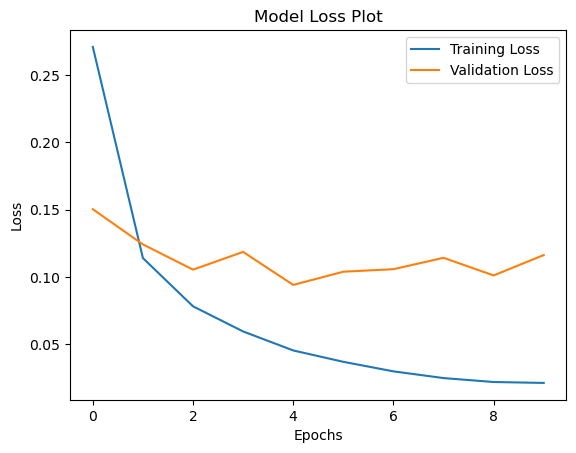

In [8]:
#Plotting the loss plots.
#Our next task is to plot the training loss and validation loss.
#Also, visualize how the model performs by watching the loss decrease as much as possible without overfitting.
plt.plot(sequential_model_trained.history['loss'])
plt.plot(sequential_model_trained.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

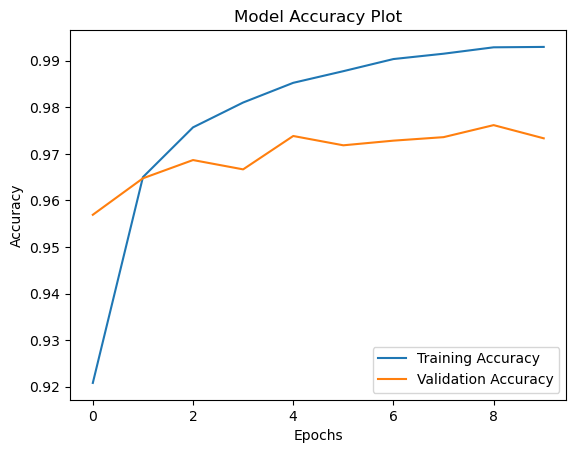

In [9]:
#Plotting the accuracy plots.
#Our next task is to plot the training accuracy and validation accuracy.
#Also, visualize how the model performs by watching the accuracy rise as much as possible without overfitting.
plt.plot(sequential_model_trained.history['accuracy'])
plt.plot(sequential_model_trained.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [10]:
#Once, we have the model trained and validated, we use it to classify the test data which the model has never seen.
#In the real life, this accuracy actually tells us how the model will perform when deployed on live data.
test_loss, test_accuracy = sequential_model.evaluate(test_dataset, test_labels)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9746
Test accuracy: 0.9746000170707703


In [11]:
#For the next part, we are instructed to creating a CNN model with convolution and pooling layers.
CNN_model = Sequential() #Empty sequential model initialization.

#We arbitrarily choose the number of filters as 32 and 64.

#Adding the first convolutional layer with 32 filters, each of size 3x3, with a ReLU activation function.
#The input_shape tells about the shape of each input sample, which is a 28x28 grayscale image with 1 channel.
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#Adding the first max pooling layer with 2x2 pool size.
#This layer helps to reduce the dimensions of previous layer's output by a factor of 2.
CNN_model.add(MaxPooling2D((2, 2)))

#Adding the second convolutional layer with 64 filters, each of size 3x3, with a ReLU activation function.
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))

#Adding the second max pooling layer with 2x2 pool size.
#This layer helps to reduce the dimensions of previous layer's output by a factor of 2.
CNN_model.add(MaxPooling2D((2, 2)))

#Adding the final convolutional layer, again with 64 filters, each of size 3x3, with a ReLU activation function.
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))

#Now, we want to convert the output of previous layer to 1D vector, so we use flatten() on previous layer output.
CNN_model.add(Flatten())

#Since the output of the flattening layer is a high dimensional feature vector, we need to add one or more hidden layers before the final output layer.
#Adding this layer helps us to get better results as it improves model's ability.
CNN_model.add(Dense(64, activation='relu'))

#Adding the final layer to the model with 10 input units with SoftMax activation function. We choose N=10 as we have 10 classes, i.e., 0 to 9.
#This layer is responsible for classifying the input belongs to which class.
CNN_model.add(Dense(10, activation='softmax'))

In [12]:
#Compiling the model using the following parameters:
#optimizer='adam', we choose this optimizer as it is a common optimizer for machine learning tasks. It has an adaptive learning rate.
#loss='sparse_categorical_crossentropy', we choose the loss function as catergorical crossentropy because it is widely used for multiclassification problems where the output classes are integers. Also, it works very well with adam optimizer.
#metrics='accuracy', we choose accuracy as the choice of metric to see how well the model performs. Also, we can plot and see the accuracy and loss.
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Now, we train the model to optimize the weights and bias in the model to minimize the loss function on the training dataset, while taking care that model is not overfitting to the training data. We use the validation dataset to validate the performance of the model on data that it has not seen during training, which helps us to prevent overfitting.

After multiple experiments, I found that the model performs best with number of Epochs = 10.
<br>Hence I chose the same for my final experiment.

In [13]:
#Training the model.
#Once we have compiled the model, we use the fit function to use the input data and train the neural network.
#Using the optimizer, loss function, activation function, we defined the model with prior to compilation.
CNN_model_trained = CNN_model.fit(training_dataset, training_labels, epochs=10, validation_data=(validation_dataset, validation_labels))

Epoch 1/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1756 - accuracy: 0.9455 - val_loss: 0.0607 - val_accuracy: 0.9842
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 3/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0357 - val_accuracy: 0.9900
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0380 -

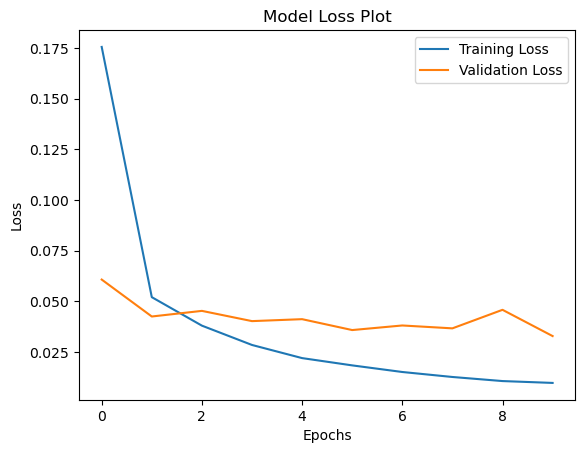

In [14]:
#Plotting the loss plots.
#Our next task is to plot the training loss and validation loss.
#Also, visualize how the model performs by watching the loss decrease as much as possible without overfitting.
plt.plot(CNN_model_trained.history['loss'])
plt.plot(CNN_model_trained.history['val_loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

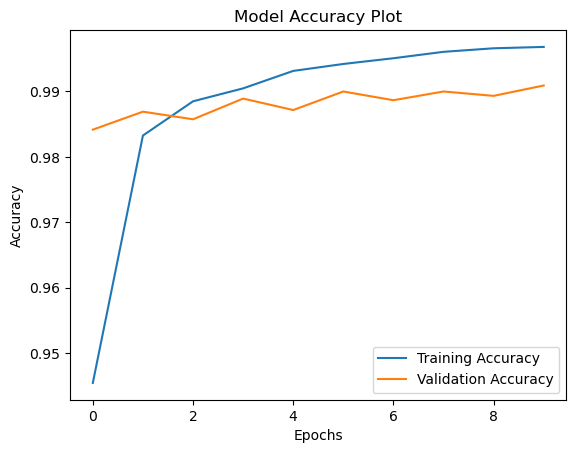

In [15]:
#Plotting the accuracy plots.
#Our next task is to plot the training accuracy and validation accuracy.
#Also, visualize how the model performs by watching the accuracy rise as much as possible without overfitting.
plt.plot(CNN_model_trained.history['accuracy'])
plt.plot(CNN_model_trained.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [16]:
#Once, we have the model trained and validated, we use it to classify the test data which the model has never seen.
#In the real life, this accuracy actually tells us how the model will perform when deployed on live data.
test_loss, test_accuracy = CNN_model.evaluate(test_dataset, test_labels)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


As we can observe that when we used convolution layers and max pooling, the accuracy of the model went up from
<br>97.46% to 99.02%

5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images. 

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy. 



<h3>Some Details About CIFAR-10 Dataset</h3>

The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Here are the classes in the dataset, as well as 10 random images from each: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The classes are completely mutually exclusive. There is no overlap between automobiles and trucks.

Citation for cifar 10 dataset
<br>Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

In [17]:
#Importing all the necessary libraries and packages.
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [18]:
#Loading the CIFAR-10 dataset as train and test data.
(training_dataset, training_labels), (test_dataset, test_labels) = cifar10.load_data()

In [19]:
#Splitting the data into training, validation and testing sets.
#We choose validation dataset to be 20% of the training dataset.
training_dataset, validation_dataset, training_labels, validation_labels = train_test_split(training_dataset, training_labels, test_size=0.2, random_state=23)

In [24]:
#For the next part, we are instructed to creating a CNN model with convolution and pooling layers.
CNN_model = Sequential() #Empty sequential model initialization.

#We arbitrarily choose the number of filters as 32 and 64.

#Adding the convolutional layers with 32 & 64 filters, each of size 3x3, with a ReLU activation function.
#The input_shape tells about the shape of each input sample, which is a 32x32 color image with 3 channels.
CNN_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

#Adding the first max pooling layer with 2x2 pool size.
#This layer helps to reduce the dimensions of previous layer's output by a factor of 2.
CNN_model.add(MaxPooling2D((2, 2)))

#Adding the convolutional layers with 64 & 128 filters, each of size 3x3, with a ReLU activation function.
CNN_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
CNN_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

#Adding the second max pooling layer with 2x2 pool size.
#This layer helps to reduce the dimensions of previous layer's output by a factor of 2.
CNN_model.add(MaxPooling2D((2, 2)))

#Now, we want to convert the output of previous layer to 1D vector, so we use flatten() on previous layer output.
CNN_model.add(Flatten())

#Since the output of the flattening layer is a high dimensional feature vector, we need to add one or more hidden layers before the final output layer.
#Adding this layer helps us to get better results as it improves model's ability.
CNN_model.add(Dense(128, activation='relu'))

#Adding the final layer to the model with 10 input units with SoftMax activation function. We choose N=10 as we have 10 classes, i.e., 0 to 9.
#This layer is responsible for classifying the input belongs to which class.
CNN_model.add(Dense(10, activation='softmax'))

In [25]:
#Compiling the model using the following parameters:
#optimizer='adam', we choose this optimizer as it is a common optimizer for machine learning tasks. It has an adaptive learning rate.
#loss='sparse_categorical_crossentropy', we choose the loss function as catergorical crossentropy because it is widely used for multiclassification problems where the output classes are integers. Also, it works very well with adam optimizer.
#metrics='accuracy', we choose accuracy as the choice of metric to see how well the model performs. Also, we can plot and see the accuracy and loss.
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the model.
#Once we have compiled the model, we use the fit function to use the input data and train the neural network.
#Using the optimizer, loss function, activation function, we defined the model with prior to compilation.
CNN_model_trained = CNN_model.fit(training_dataset, training_labels, epochs=10, validation_data=(validation_dataset, validation_labels))

Epoch 1/10
1250/1250 [==============================] - 130s 104ms/step - loss: 1.7919 - accuracy: 0.4457 - val_loss: 1.2998 - val_accuracy: 0.5499
Epoch 2/10
1250/1250 [==============================] - 131s 105ms/step - loss: 1.1650 - accuracy: 0.5893 - val_loss: 1.2074 - val_accuracy: 0.5883
Epoch 3/10
1250/1250 [==============================] - 132s 105ms/step - loss: 0.9996 - accuracy: 0.6499 - val_loss: 1.1616 - val_accuracy: 0.6177
Epoch 4/10
1250/1250 [==============================] - 131s 105ms/step - loss: 0.8785 - accuracy: 0.6913 - val_loss: 1.0900 - val_accuracy: 0.6355
Epoch 5/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.7783 - accuracy: 0.7277 - val_loss: 1.1029 - val_accuracy: 0.6382
Epoch 6/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.6728 - accuracy: 0.7657 - val_loss: 1.1767 - val_accuracy: 0.6247
Epoch 7/10
1250/1250 [==============================] - 133s 107ms/step - loss: 0.5862 - accuracy: 0.7910 - val_

In [26]:
#Once, we have the model trained and validated, we use it to classify the test data which the model has never seen.
#In the real life, this accuracy actually tells us how the model will perform when deployed on live data.
test_loss, test_accuracy = CNN_model.evaluate(test_dataset, test_labels)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 6s 19ms/step - loss: 1.5898 - accuracy: 0.6100
Test accuracy: 0.6100000143051147


In [29]:
#Tuning the hyperparameters of the model:
#There are several hyperparameters that can be tuned, such as, number of filters in convolution layer, pool size in max pool layer, number of epochs, learning rate, etc.
#for experimentation purposes, I am tuning number of filters in convolution layer and number of units in the dense layer.
tuned_model1 = Sequential()
tuned_model1.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
tuned_model1.add(BatchNormalization())
tuned_model1.add(Conv2D(32, (3,3), padding='same', activation='relu'))
tuned_model1.add(BatchNormalization())
tuned_model1.add(MaxPooling2D(pool_size=(2,2)))
tuned_model1.add(Dropout(0.3))

tuned_model1.add(Flatten())
tuned_model1.add(Dense(128, activation='relu'))
tuned_model1.add(BatchNormalization())
tuned_model1.add(Dropout(0.5))
tuned_model1.add(Dense(10, activation='softmax'))

tuned_model2 = Sequential()
tuned_model2.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
tuned_model2.add(BatchNormalization())
tuned_model2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
tuned_model2.add(BatchNormalization())
tuned_model2.add(MaxPooling2D(pool_size=(2,2)))
tuned_model2.add(Dropout(0.5))

tuned_model2.add(Flatten())
tuned_model2.add(Dense(128, activation='relu'))
tuned_model2.add(BatchNormalization())
tuned_model2.add(Dropout(0.5))
tuned_model2.add(Dense(10, activation='softmax'))

tuned_model3 = Sequential()
tuned_model3.add(Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
tuned_model3.add(BatchNormalization())
tuned_model3.add(Conv2D(128, (3,3), padding='same', activation='relu'))
tuned_model3.add(BatchNormalization())
tuned_model3.add(MaxPooling2D(pool_size=(2,2)))
tuned_model3.add(Dropout(0.5))

tuned_model3.add(Flatten())
tuned_model3.add(Dense(128, activation='relu'))
tuned_model3.add(BatchNormalization())
tuned_model3.add(Dropout(0.5))
tuned_model3.add(Dense(10, activation='softmax'))

In [30]:
#Compiling the model using the following parameters:
#optimizer='adam', we choose this optimizer as it is a common optimizer for machine learning tasks. It has an adaptive learning rate.
#loss='sparse_categorical_crossentropy', we choose the loss function as catergorical crossentropy because it is widely used for multiclassification problems where the output classes are integers. Also, it works very well with adam optimizer.
#metrics='accuracy', we choose accuracy as the choice of metric to see how well the model performs. Also, we can plot and see the accuracy and loss.
tuned_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tuned_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tuned_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the model.
#Once we have compiled the model, we use the fit function to use the input data and train the neural network.
#Using the optimizer, loss function, activation function, we defined the model with prior to compilation.
tuned_model1_trained = tuned_model1.fit(training_dataset, training_labels, epochs=10, validation_data=(validation_dataset, validation_labels))

tuned_model2_trained = tuned_model2.fit(training_dataset, training_labels, epochs=10, validation_data=(validation_dataset, validation_labels))

tuned_model3_trained = tuned_model3.fit(training_dataset, training_labels, epochs=10, validation_data=(validation_dataset, validation_labels))

Epoch 1/10
1250/1250 [==============================] - 76s 60ms/step - loss: 1.5959 - accuracy: 0.4554 - val_loss: 1.2791 - val_accuracy: 0.5380
Epoch 2/10
1250/1250 [==============================] - 75s 60ms/step - loss: 1.1542 - accuracy: 0.5939 - val_loss: 1.2858 - val_accuracy: 0.5697
Epoch 3/10
1250/1250 [==============================] - 76s 61ms/step - loss: 1.0547 - accuracy: 0.6290 - val_loss: 0.9951 - val_accuracy: 0.6479
Epoch 4/10
1250/1250 [==============================] - 76s 60ms/step - loss: 0.9635 - accuracy: 0.6647 - val_loss: 1.2602 - val_accuracy: 0.5838
Epoch 5/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.9108 - accuracy: 0.6825 - val_loss: 0.9473 - val_accuracy: 0.6717
Epoch 6/10
1250/1250 [==============================] - 77s 62ms/step - loss: 0.8558 - accuracy: 0.6992 - val_loss: 0.8980 - val_accuracy: 0.6869
Epoch 7/10
1250/1250 [==============================] - 77s 61ms/step - loss: 0.8047 - accuracy: 0.7192 - val_loss: 0.8531 -

In [31]:
#Once, we have the model trained and validated, we use it to classify the test data which the model has never seen.
#In the real life, this accuracy actually tells us how the model will perform when deployed on live data.
test_loss1, test_accuracy1 = tuned_model1.evaluate(test_dataset, test_labels)
print('Test accuracy with N=32 filters in convolution layer:', test_accuracy1)

test_loss2, test_accuracy2 = tuned_model2.evaluate(test_dataset, test_labels)
print('Test accuracy with N=64 filters in convolution layer:', test_accuracy2)

test_loss3, test_accuracy3 = tuned_model3.evaluate(test_dataset, test_labels)
print('Test accuracy with N=128 filters in convolution layer:', test_accuracy3)

313/313 [==============================] - 3s 9ms/step - loss: 0.8908 - accuracy: 0.6845
Test accuracy with N=32 filters in convolution layer: 0.684499979019165
313/313 [==============================] - 6s 20ms/step - loss: 0.8110 - accuracy: 0.7181
Test accuracy with N=64 filters in convolution layer: 0.7181000113487244
313/313 [==============================] - 20s 65ms/step - loss: 0.8576 - accuracy: 0.7123
Test accuracy with N=128 filters in convolution layer: 0.7123000025749207


As we can see that with different number of filters, we get a different test data accuracy.
When we tuned number of filters and units in the hidden dense layer, the accuracy improved from 61% to 71.8%.